In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re 

plt.style.use("default")


In [ ]:
df = pd.read_csv("df_merged.csv")

print("DataFrame shape:", df.shape)
print("\nDataFrame info:")
print(df.info())

print("\nFirst five rows:")
display(df.head())

print("\nColumns:")
print(df.columns.tolist())


DataFrame shape: (114465, 5)

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114465 entries, 0 to 114464
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   name               114464 non-null  object
 1   goods_or_services  114465 non-null  object
 2   category           114465 non-null  object
 3   about_product      114464 non-null  object
 4   review             63995 non-null   object
dtypes: object(5)
memory usage: 4.4+ MB
None

First five rows:


,name,goods_or_services,category,about_product,review
0,Wayona Nylon Braided USB to Lightning Fast Cha...,goods,Computers&Accessories|Accessories&Peripherals|...,High Compatibility : Compatible With iPhone 12...,"Satisfied,Charging is really fast,Value for mo..."
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,goods,Computers&Accessories|Accessories&Peripherals|...,"Compatible with all Type C enabled devices, be...","A Good Braided Cable for Your Type C Device,Go..."
2,Sounce Fast Phone Charging Cable & Data Sync U...,goods,Computers&Accessories|Accessories&Peripherals|...,【 Fast Charger& Data Sync】-With built-in safet...,"Good speed for earlier versions,Good Product,W..."
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,goods,Computers&Accessories|Accessories&Peripherals|...,The boAt Deuce USB 300 2 in 1 cable is compati...,"Good product,Good one,Nice,Really nice product..."
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,goods,Computers&Accessories|Accessories&Peripherals|...,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"As good as original,Decent,Good one for second..."



Columns:
['name', 'goods_or_services', 'category', 'about_product', 'review']


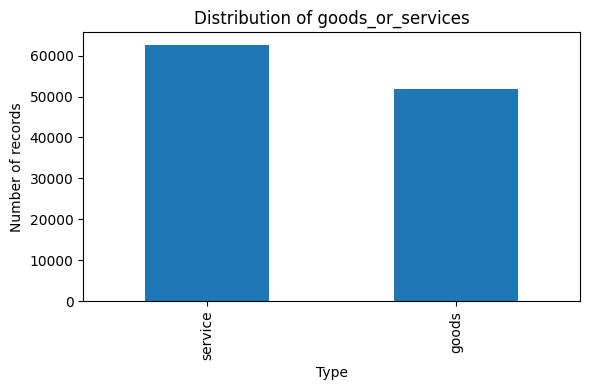

In [ ]:
plt.figure(figsize=(6, 4))
df["goods_or_services"].value_counts().plot(kind="bar")

plt.title("Distribution of goods_or_services")
plt.xlabel("Type")
plt.ylabel("Number of records")
plt.tight_layout()
plt.show()


## Exploratory Data Analysis: Class distribution and word clouds


In [12]:
def generate_wordcloud(text_series, title, stopwords):
    """
    Generate and display a word cloud for a given pandas Series of text.
    """
    combined_text = " ".join(text_series.astype(str).tolist())

    if not combined_text.strip():
        print(f"Not enough text to generate a word cloud for: {title}")
        return

    wc = WordCloud(
        width=1200,
        height=600,
        background_color="white",
        stopwords=stopwords,
        max_words=200
    ).generate(combined_text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.tight_layout()
    plt.show()




In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["product", "service", "goods", "services"])

goods_df = df[df["goods_or_services"] == "goods"]
services_df = df[df["goods_or_services"] == "service"]

print(f"Number of goods records: {len(goods_df)}")
print(f"Number of service records: {len(services_df)}")


Number of goods records: 51890
Number of service records: 62575


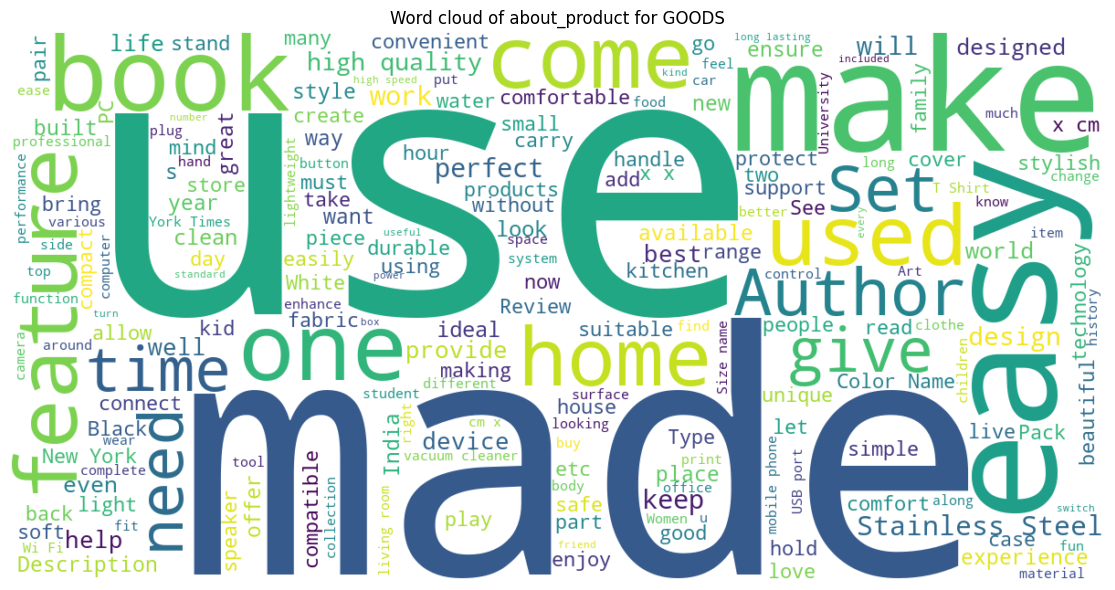

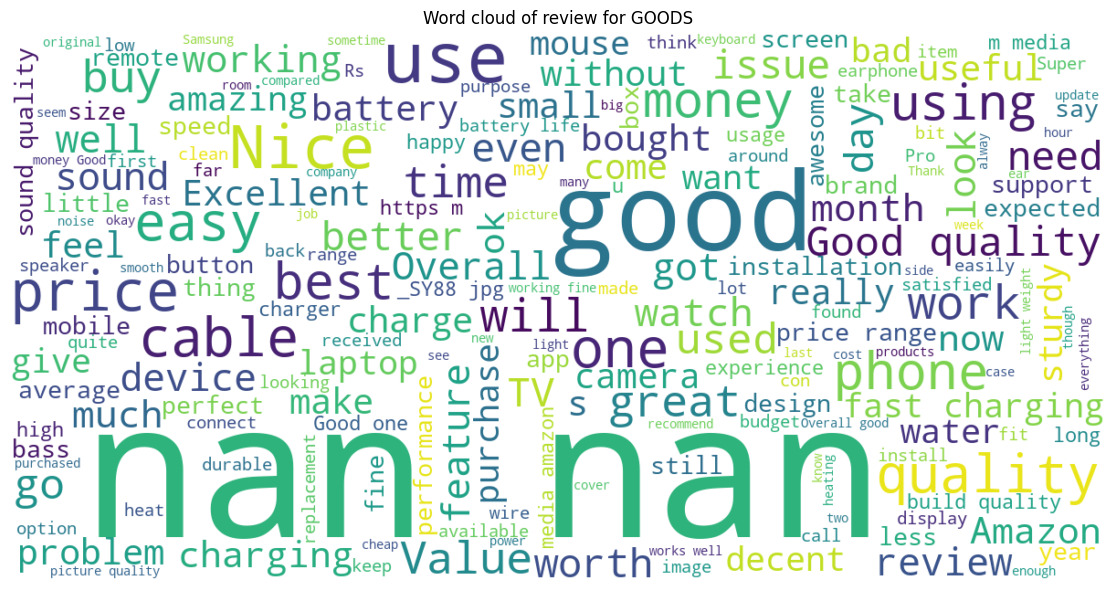

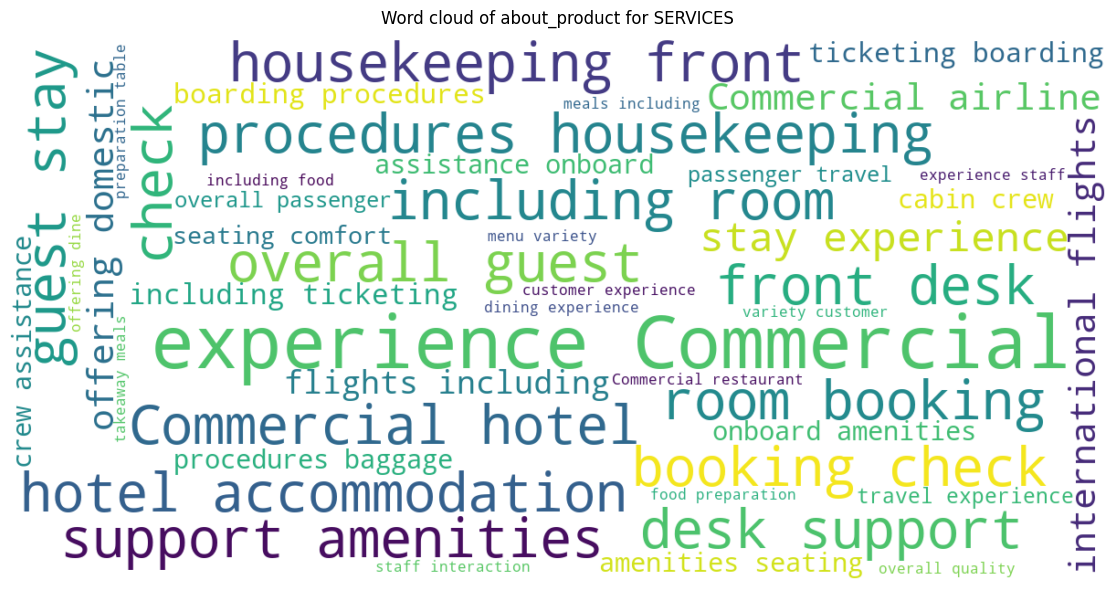

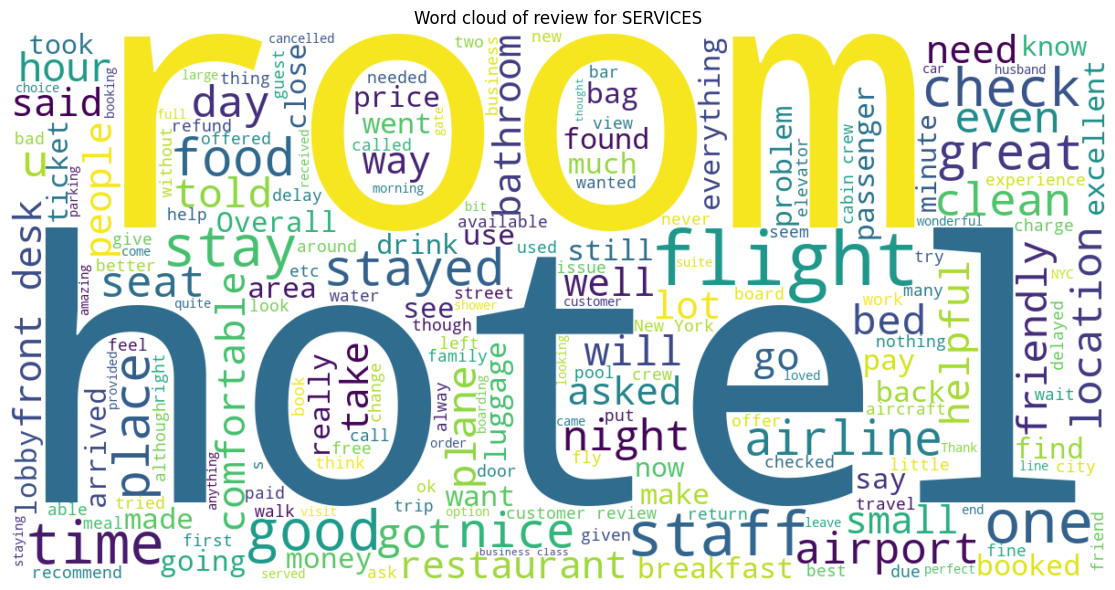

In [ ]:
if "about_product" in df.columns:
    generate_wordcloud(
        goods_df["about_product"],
        "Word cloud of about_product for GOODS",
        stopwords
    )

if "review" in df.columns:
    generate_wordcloud(
        goods_df["review"],
        "Word cloud of review for GOODS",
        stopwords
    )

if "about_product" in df.columns:
    generate_wordcloud(
        services_df["about_product"],
        "Word cloud of about_product for SERVICES",
        stopwords
    )

if "review" in df.columns:
    generate_wordcloud(
        services_df["review"],
        "Word cloud of review for SERVICES",
        stopwords
    )


## Text preprocessing: building unified text fields
We create a working copy of the dataset, merge the different text sources into a single field, and apply basic cleaning.


In [ ]:
dfcopy = df.copy()
print("Working copy created successfully.")

text_columns = ["name", "about_product", "review"]

for col in text_columns:
    if col in dfcopy.columns:
        dfcopy[col] = dfcopy[col].fillna("").astype(str)
    else:
        dfcopy[col] = ""



Working copy created successfully.


In [ ]:
def build_text(row):
    """
    Build a single raw text field from name, about_product and review.
    """
    name = row["name"].strip()
    about = row["about_product"].strip()
    review = row["review"].strip()

    if name and about and name.lower() == about.lower():
        name = ""

    about_len = len(about.split())
    review_len = len(review.split())

    if about_len == 0 and review_len == 0:
        main = name
    elif about_len >= review_len:
        main = about
    else:
        main = review

    if not main:
        main = name

    if name and main and name.lower() not in main.lower():
        text = name + " " + main
    else:
        text = main

    return text.strip()

dfcopy["text_raw"] = dfcopy.apply(build_text, axis=1)

print("Example of text_raw:")
display(dfcopy[["name", "about_product", "review", "text_raw"]].head())


Example of text_raw:


,name,about_product,review,text_raw
0,Wayona Nylon Braided USB to Lightning Fast Cha...,High Compatibility : Compatible With iPhone 12...,"Satisfied,Charging is really fast,Value for mo...",Wayona Nylon Braided USB to Lightning Fast Cha...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,"Compatible with all Type C enabled devices, be...","A Good Braided Cable for Your Type C Device,Go...",Ambrane Unbreakable 60W / 3A Fast Charging 1.5...
2,Sounce Fast Phone Charging Cable & Data Sync U...,【 Fast Charger& Data Sync】-With built-in safet...,"Good speed for earlier versions,Good Product,W...",Sounce Fast Phone Charging Cable & Data Sync U...
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,The boAt Deuce USB 300 2 in 1 cable is compati...,"Good product,Good one,Nice,Really nice product...",boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"As good as original,Decent,Good one for second...",Portronics Konnect L 1.2M Fast Charging 3A 8 P...


### 5.1 Text cleaning
We normalize the text and remove URLs, emails and non-alphabetic characters.


In [ ]:
def clean_text(text):
    """
    Lowercase the text, remove URLs, emails, and non-alphabetic characters,
    and normalize whitespace.
    """
    text = str(text).lower()
    text = re.sub(r"http\S+|www\.\S+", " ", text)  
    text = re.sub(r"\S+@\S+", " ", text)           
    text = re.sub(r"[^a-zA-ZÀ-ÖØ-öø-ÿ\s]", " ", text)  
    text = re.sub(r"\s+", " ", text).strip()       
    return text

dfcopy["text_clean"] = dfcopy["text_raw"].apply(clean_text)

print("\nExample of text_clean:")
display(dfcopy[["text_raw", "text_clean"]].head())




Example of text_clean:


,text_raw,text_clean
0,Wayona Nylon Braided USB to Lightning Fast Cha...,wayona nylon braided usb to lightning fast cha...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,ambrane unbreakable w a fast charging m braide...
2,Sounce Fast Phone Charging Cable & Data Sync U...,sounce fast phone charging cable data sync usb...
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,boat deuce usb in type c micro usb stress resi...
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,portronics konnect l m fast charging a pin usb...


## Train, validation and test split
We split the cleaned text into train, validation and test sets with stratification on the goods_or_services label.



In [ ]:
from sklearn.model_selection import train_test_split

X = dfcopy["text_clean"]
y = dfcopy["goods_or_services"]

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size=0.2,
    random_state=42,
    stratify=y_train_val
)

print("Train size:", len(X_train))
print("Validation size:", len(X_val))
print("Test size:", len(X_test))

print("\nTrain label distribution:")
print(y_train.value_counts(normalize=True))

print("\nValidation label distribution:")
print(y_val.value_counts(normalize=True))

print("\nTest label distribution:")
print(y_test.value_counts(normalize=True))



Train size: 73257
Validation size: 18315
Test size: 22893

Train label distribution:
goods_or_services
service    0.546678
goods      0.453322
Name: proportion, dtype: float64

Validation label distribution:
goods_or_services
service    0.546656
goods      0.453344
Name: proportion, dtype: float64

Test label distribution:
goods_or_services
service    0.546674
goods      0.453326
Name: proportion, dtype: float64


## Baseline model: TF IDF and Logistic Regression
We train a simple baseline classifier that combines TF IDF features with Logistic Regression.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

tfidf_logreg = Pipeline([
    ("tfidf", TfidfVectorizer(
        max_features=50000,   
        ngram_range=(1, 2),   
        min_df=5              
    )),
    ("clf", LogisticRegression(
        max_iter=1000,
        n_jobs=-1
    ))
])

tfidf_logreg.fit(X_train, y_train)

y_val_pred = tfidf_logreg.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)
print("Validation accuracy TF IDF plus LogReg:", val_acc)

print("\nValidation classification report:")
print(classification_report(y_val, y_val_pred))

print("\nValidation confusion matrix:")
print(confusion_matrix(y_val, y_val_pred))


Validation accuracy TF IDF plus LogReg: 0.9991809991809992

Validation classification report:
              precision    recall  f1-score   support

       goods       1.00      1.00      1.00      8303
     service       1.00      1.00      1.00     10012

    accuracy                           1.00     18315
   macro avg       1.00      1.00      1.00     18315
weighted avg       1.00      1.00      1.00     18315


Validation confusion matrix:
[[ 8295     8]
 [    7 10005]]


### Final evaluation on the test set
We keep the validation set for model selection and use the test set only once for the final performance estimate.


In [ ]:
y_test_pred = tfidf_logreg.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print("Test accuracy TF IDF plus LogReg:", test_acc)
print("\nTest classification report:")
print(classification_report(y_test, y_test_pred))
print("\nTest confusion matrix:")
print(confusion_matrix(y_test, y_test_pred))

Test accuracy TF IDF plus LogReg: 0.998733237234089

Test classification report:
              precision    recall  f1-score   support

       goods       1.00      1.00      1.00     10378
     service       1.00      1.00      1.00     12515

    accuracy                           1.00     22893
   macro avg       1.00      1.00      1.00     22893
weighted avg       1.00      1.00      1.00     22893


Test confusion matrix:
[[10368    10]
 [   19 12496]]


## Robustness experiment: remove obvious service keywords
To test the robustness of the classifier, we removed domain specific keywords that could trivially reveal the category 
(for example hotel, restaurant, flight, airline). We then retrained our baseline model and observed how performance changed.


In [ ]:
obvious_words = [
    "hotel", "hotels", "hostel", "hostels",
    "restaurant", "restaurants",
    "flight", "flights", "airline", "airlines",
    "room", "rooms",
    "check in", "check-in", "check out", "check-out",
    "booking", "booked", "reservation", "reservations",
    "stay", "stayed", "service", "services"
]

def remove_obvious(text):
    text = str(text).lower()
    for w in obvious_words:
        text = text.replace(w, " ")
    text = re.sub(r"\s+", " ", text).strip()
    return text

dfcopy["text_masked"] = dfcopy["text_clean"].apply(remove_obvious)

print("Example of masked text:")
display(dfcopy[["text_clean", "text_masked"]].head())

X2 = dfcopy["text_masked"]
y2 = dfcopy["goods_or_services"]

X2_train_val, X2_test, y2_train_val, y2_test = train_test_split(
    X2,
    y2,
    test_size=0.2,
    random_state=42,
    stratify=y2
)

X2_train, X2_val, y2_train, y2_val = train_test_split(
    X2_train_val,
    y2_train_val,
    test_size=0.2,
    random_state=42,
    stratify=y2_train_val
)


Example of masked text:


,text_clean,text_masked
0,wayona nylon braided usb to lightning fast cha...,wayona nylon braided usb to lightning fast cha...
1,ambrane unbreakable w a fast charging m braide...,ambrane unbreakable w a fast charging m braide...
2,sounce fast phone charging cable data sync usb...,sounce fast phone charging cable data sync usb...
3,boat deuce usb in type c micro usb stress resi...,boat deuce usb in type c micro usb stress resi...
4,portronics konnect l m fast charging a pin usb...,portronics konnect l m fast charging a pin usb...


## Baseline on masked text
We train exactly the same TF IDF plus Logistic Regression model on the masked text and compare the results.


In [ ]:
tfidf_logreg_masked = Pipeline([
    ("tfidf", TfidfVectorizer(
        max_features=50000,
        ngram_range=(1, 2),
        min_df=5
    )),
    ("clf", LogisticRegression(
        max_iter=1000,
        n_jobs=-1
    ))
])

tfidf_logreg_masked.fit(X2_train, y2_train)

y2_val_pred = tfidf_logreg_masked.predict(X2_val)
val2_acc = accuracy_score(y2_val, y2_val_pred)

print("Validation accuracy without obvious keywords:", val2_acc)
print("\nValidation classification report:")
print(classification_report(y2_val, y2_val_pred))
print("\nValidation confusion matrix:")
print(confusion_matrix(y2_val, y2_val_pred))

y2_test_pred = tfidf_logreg_masked.predict(X2_test)
test2_acc = accuracy_score(y2_test, y2_test_pred)

print("Test accuracy without obvious keywords:", test2_acc)
print("\nTest classification report:")
print(classification_report(y2_test, y2_test_pred))
print("\nTest confusion matrix:")
print(confusion_matrix(y2_test, y2_test_pred))


Validation accuracy without obvious keywords: 0.998962598962599

Validation classification report:
              precision    recall  f1-score   support

       goods       1.00      1.00      1.00      8303
     service       1.00      1.00      1.00     10012

    accuracy                           1.00     18315
   macro avg       1.00      1.00      1.00     18315
weighted avg       1.00      1.00      1.00     18315


Validation confusion matrix:
[[ 8292    11]
 [    8 10004]]
Test accuracy without obvious keywords: 0.9984274669112829

Test classification report:
              precision    recall  f1-score   support

       goods       1.00      1.00      1.00     10378
     service       1.00      1.00      1.00     12515

    accuracy                           1.00     22893
   macro avg       1.00      1.00      1.00     22893
weighted avg       1.00      1.00      1.00     22893


Test confusion matrix:
[[10364    14]
 [   22 12493]]


## SBERT: data preparation and split
We use the raw merged text field and create a train, validation and test split for the SBERT based classifier.



In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
X_sbert = dfcopy["text_raw"]
y_sbert = dfcopy["goods_or_services"]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_sbert,
    y_sbert,
    test_size=0.2,
    random_state=42,
    stratify=y_sbert
)

X_train_s, X_val_s, y_train_s, y_val_s = train_test_split(
    X_train_s,
    y_train_s,
    test_size=0.2,
    random_state=42,
    stratify=y_train_s
)

print("SBERT - Train size:", len(X_train_s))
print("SBERT - Validation size:", len(X_val_s))
print("SBERT - Test size:", len(X_test_s))

print("\nSBERT - Train label distribution:")
print(y_train_s.value_counts(normalize=True))


SBERT - Train size: 73257
SBERT - Validation size: 18315
SBERT - Test size: 22893

SBERT - Train label distribution:
goods_or_services
service    0.546678
goods      0.453322
Name: proportion, dtype: float64


### SBERT model and embeddings
We load a multilingual SBERT model and compute sentence embeddings for the train, validation and test splits.


In [ ]:
model_name = "paraphrase-multilingual-MiniLM-L12-v2"
sbert_model = SentenceTransformer(model_name)

print("SBERT model loaded:", model_name)

train_texts = X_train_s.tolist()
val_texts = X_val_s.tolist()
test_texts = X_test_s.tolist()

X_train_emb = sbert_model.encode(train_texts, batch_size=64, show_progress_bar=True)
X_val_emb = sbert_model.encode(val_texts, batch_size=64, show_progress_bar=True)
X_test_emb = sbert_model.encode(test_texts, batch_size=64, show_progress_bar=True)

print("Train embeddings shape:", X_train_emb.shape)
print("Validation embeddings shape:", X_val_emb.shape)
print("Test embeddings shape:", X_test_emb.shape)


SBERT model loaded: paraphrase-multilingual-MiniLM-L12-v2


Batches:   0%|          | 0/1145 [00:00<?, ?it/s]

Batches:   0%|          | 0/287 [00:00<?, ?it/s]

Batches:   0%|          | 0/358 [00:00<?, ?it/s]

Train embeddings shape: (73257, 384)
Validation embeddings shape: (18315, 384)
Test embeddings shape: (22893, 384)


## SBERT plus Logistic Regression: training and evaluation
We train a simple linear classifier on top of the SBERT embeddings and evaluate it on the validation and test sets.


In [ ]:
sbert_clf = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

sbert_clf.fit(X_train_emb, y_train_s)

y_val_pred_s = sbert_clf.predict(X_val_emb)
val_acc_s = accuracy_score(y_val_s, y_val_pred_s)

print("SBERT + LogReg - Validation accuracy:", val_acc_s)
print("\nValidation classification report:")
print(classification_report(y_val_s, y_val_pred_s))
print("\nValidation confusion matrix:")
print(confusion_matrix(y_val_s, y_val_pred_s))

y_test_pred_s = sbert_clf.predict(X_test_emb)
test_acc_s = accuracy_score(y_test_s, y_test_pred_s)

print("SBERT + LogReg - Test accuracy:", test_acc_s)
print("\nTest classification report:")
print(classification_report(y_test_s, y_test_pred_s))
print("\nTest confusion matrix:")
print(confusion_matrix(y_test_s, y_test_pred_s))


SBERT + LogReg - Validation accuracy: 0.9989079989079989

Validation classification report:
              precision    recall  f1-score   support

       goods       1.00      1.00      1.00      8303
     service       1.00      1.00      1.00     10012

    accuracy                           1.00     18315
   macro avg       1.00      1.00      1.00     18315
weighted avg       1.00      1.00      1.00     18315


Validation confusion matrix:
[[8296    7]
 [  13 9999]]
SBERT + LogReg - Test accuracy: 0.9982964224872232

Test classification report:
              precision    recall  f1-score   support

       goods       1.00      1.00      1.00     10378
     service       1.00      1.00      1.00     12515

    accuracy                           1.00     22893
   macro avg       1.00      1.00      1.00     22893
weighted avg       1.00      1.00      1.00     22893


Test confusion matrix:
[[10362    16]
 [   23 12492]]


## Model comparison
We summarize the validation and test accuracy for the TF IDF baseline and the SBERT based classifier.



In [27]:
import pandas as pd

results = pd.DataFrame([
    {
        "model": "TF-IDF + Logistic Regression",
        "text_representation": "text_clean (unmasked, ngrams)",
        "val_accuracy": round(val_acc, 4),
        "test_accuracy": round(test_acc, 4),
    },
    {
        "model": "SBERT + Logistic Regression",
        "text_representation": "text_raw (multilingual embeddings)",
        "val_accuracy": round(val_acc_s, 4),
        "test_accuracy": round(test_acc_s, 4),
    }
])

print(results)
print("\nMarkdown version:")
print(results.to_markdown(index=False))


                          model                 text_representation  \
0  TF-IDF + Logistic Regression       text_clean (unmasked, ngrams)   
1   SBERT + Logistic Regression  text_raw (multilingual embeddings)   

   val_accuracy  test_accuracy  
0        0.9992         0.9987  
1        0.9989         0.9983  

Markdown version:
| model                        | text_representation                |   val_accuracy |   test_accuracy |
|:-----------------------------|:-----------------------------------|---------------:|----------------:|
| TF-IDF + Logistic Regression | text_clean (unmasked, ngrams)      |         0.9992 |          0.9987 |
| SBERT + Logistic Regression  | text_raw (multilingual embeddings) |         0.9989 |          0.9983 |


## External validation on a small hand labeled set
We construct a small multilingual set of goods and services descriptions inspired by trademark and classification texts.
We then use it as an external validation set for both models.


In [ ]:
import pandas as pd

external_examples = [
    {
        "text": "Design and development of computer software, namely, a mobile application for tracking personal fitness activities.",
        "true_label": "service"
    },
    {
        "text": "Roasted coffee beans, ground coffee, and instant coffee, sold in vacuum-sealed bags and single-serve pods.",
        "true_label": "goods"
    },
    {
        "text": "Financial services, namely, providing loans, lines of credit, and credit card services to small and medium-sized enterprises.",
        "true_label": "service"
    },
    {
        "text": "Protective face masks for non-medical purposes, disposable wipes pre-moistened with cleaning chemicals, and hand sanitizer.",
        "true_label": "goods"
    },
    {
        "text": "Providing temporary accommodation in hotels and resorts, including restaurant, catering, and banquet services for events.",
        "true_label": "service"
    },
    {
        "text": "Non-alcoholic beverages, namely, carbonated soft drinks, fruit juices, and energy drinks containing vitamins and electrolytes.",
        "true_label": "goods"
    },
    {
        "text": "Business consulting services in the field of cloud infrastructure migration, data management, and cybersecurity strategy.",
        "true_label": "service"
    },
    {
        "text": "Electric scooters, electric bicycles, and parts thereof, including batteries, chargers, and replacement tires.",
        "true_label": "goods"
    },
    # EUIPO inspired
    {
        "text": "Leather and imitations of leather; animal skins and hides; luggage and carrying bags; umbrellas and parasols.",
        "true_label": "goods"
    },
    {
        "text": "Education; providing of training; entertainment; sporting and cultural activities, including organizing sports competitions.",
        "true_label": "service"
    },
    {
        "text": "Scientific research and development, particularly in the field of biotechnology and pharmaceutical formulations.",
        "true_label": "service"
    },
    {
        "text": "T-shirts, hoodies, hats, socks, and outerwear, namely, jackets and coats, all for men, women, and children.",
        "true_label": "goods"
    },
    {
        "text": "Retail store services featuring a wide variety of consumer goods, rendered through a global computer network.",
        "true_label": "service"
    },
    # Additional multilingual entries
    {
        "text": "Servicios de traducción e interpretación; servicios de gestión de derechos de autor y propiedad industrial.",
        "true_label": "service"
    },
    {
        "text": "Productos farmacéuticos y veterinarios; preparaciones higiénicas para usos médicos; alimentos y sustancias dietéticas para uso médico.",
        "true_label": "goods"
    },
    {
        "text": "Bekleidungsstücke, nämlich Hosen, Jacken, Röcke, Kleider, Mäntel, Pullover und Westen.",
        "true_label": "goods"
    },
    {
        "text": "Werbung; Geschäftsführung; Unternehmensverwaltung; Büroarbeiten, insbesondere Online-Marketing-Dienstleistungen.",
        "true_label": "service"
    },
    {
        "text": "Papiers, cartons et produits en ces matières non compris dans d'autres classes; produits de l'imprimerie; photographies.",
        "true_label": "goods"
    },
    {
        "text": "Services juridiques; services de sécurité pour la protection physique des biens et des individus; enquêtes de sécurité.",
        "true_label": "service"
    },
]

external_df = pd.DataFrame(external_examples)

display(external_df)


,text,true_label
0,"Design and development of computer software, n...",service
1,"Roasted coffee beans, ground coffee, and insta...",goods
2,"Financial services, namely, providing loans, l...",service
3,Protective face masks for non-medical purposes...,goods
4,Providing temporary accommodation in hotels an...,service
5,"Non-alcoholic beverages, namely, carbonated so...",goods
6,Business consulting services in the field of c...,service
7,"Electric scooters, electric bicycles, and part...",goods
8,Leather and imitations of leather; animal skin...,goods
9,Education; providing of training; entertainmen...,service


In [ ]:
from sklearn.metrics import accuracy_score

external_df["text_clean"] = external_df["text"].apply(clean_text)
external_df["pred_tfidf"] = tfidf_logreg.predict(external_df["text_clean"])

ext_embeddings = sbert_model.encode(
    external_df["text"].tolist(),
    batch_size=32,
    show_progress_bar=False
)

external_df["pred_sbert"] = sbert_clf.predict(ext_embeddings)

y_true_ext = external_df["true_label"]

tfidf_acc_ext = accuracy_score(y_true_ext, external_df["pred_tfidf"])
sbert_acc_ext = accuracy_score(y_true_ext, external_df["pred_sbert"])

print("External accuracy - TF-IDF + LogReg:", tfidf_acc_ext)
print("External accuracy - SBERT + LogReg:", sbert_acc_ext)

external_df[["text", "true_label", "pred_tfidf", "pred_sbert"]]


External accuracy - TF-IDF + LogReg: 0.47368421052631576
External accuracy - SBERT + LogReg: 0.5263157894736842


,text,true_label,pred_tfidf,pred_sbert
0,"Design and development of computer software, n...",service,goods,goods
1,"Roasted coffee beans, ground coffee, and insta...",goods,goods,goods
2,"Financial services, namely, providing loans, l...",service,goods,goods
3,Protective face masks for non-medical purposes...,goods,goods,goods
4,Providing temporary accommodation in hotels an...,service,goods,service
5,"Non-alcoholic beverages, namely, carbonated so...",goods,goods,goods
6,Business consulting services in the field of c...,service,goods,goods
7,"Electric scooters, electric bicycles, and part...",goods,goods,goods
8,Leather and imitations of leather; animal skin...,goods,goods,goods
9,Education; providing of training; entertainmen...,service,goods,goods


A key question is whether enriching the service class with more diverse service descriptions 
(consulting, legal, financial, education) helps the model generalize better to external service texts.
We explore this by comparing internal and external accuracy before and after augmenting the service examples.


## Service class augmentation: synthetic and curated services
We enrich the service class with additional descriptions inspired by official trademark and classification texts.
The goal is to improve generalization to diverse service descriptions.


In [ ]:
import pandas as pd
import random

CATEGORIES = [
    "Business consulting",
    "IT services / cloud / SaaS",
    "Legal services",
    "Financial services (loans, insurance)",
    "Education / training",
    "Healthcare / psychological services",
    "Home services (cleaning, repairs)",
    "Security services"
]

NEW_SERVICE_PATTERNS = {
    "Business consulting": [
        "Strategic planning and business development consultation.",
        "Management advisory services in organizational change.",
        "Market research and analysis for new product launches.",
        "Import and export agency services.",
        "Human resources consultancy and executive search services.",
        "Servicios de asesoramiento en fusiones y adquisiciones (M&A).",
        "Conseil en gestion de la relation client (CRM).",
        "Development of advertising campaigns and media placement.",
        "Advisory services regarding government contract bidding.",
        "Servicios de análisis de costos y precios de transferencia.",
    ],
    "IT services / cloud / SaaS": [
        "Software as a Service (SaaS) featuring tools for project management.",
        "Data encryption and decryption services.",
        "Migration of data to new computer systems.",
        "Installation and maintenance of computer networks and internet access points.",
        "Providing virtual server hosting and cloud storage services.",
        "Recuperación de datos de discos duros y sistemas dañados.",
        "Monitoring of digital media for unauthorized use.",
        "Development of virtual reality software and augmented reality apps.",
        "Location de temps d'accès à un centre serveur informatique.",
        "Servicios de análisis forense informático.",
    ],
    "Legal services": [
        "Patent filing, licensing, and prosecution services.",
        "Arbitration and dispute resolution services in civil law.",
        "Legal advice relating to corporate governance and compliance.",
        "Drafting of non-disclosure agreements (NDAs) and terms of service.",
        "Representation in trademark and copyright litigation.",
        "Servicios de notaría y legalización de documentos.",
        "Asesoramiento en derecho laboral y seguridad social.",
        "Services de dépôt légal et de conservation de documents numériques.",
        "Consultoría en derecho medioambiental y regulaciones.",
        "Investigación legal y due diligence corporativa.",
    ],
    "Financial services (loans, insurance)": [
        "Issuance of secured and unsecured loans.",
        "Provision of credit card processing services.",
        "Asset management and portfolio advisory services.",
        "Underwriting of general liability and commercial property insurance.",
        "Electronic funds transfer and currency exchange services.",
        "Servicios de factoring y descuento de pagarés.",
        "Agente de bolsa y servicios de trading electrónico.",
        "Services de gestion de fonds de pension et de retraite.",
        "Hipotecas y refinanciamiento de préstamos inmobiliarios.",
        "Servicios de fianza y garantía bancaria.",
    ],
    "Education / training": [
        "Conducting workshops and seminars in professional development.",
        "Distance learning services via online courses.",
        "Arranging and conducting educational conferences and symposia.",
        "Vocational guidance and career counseling.",
        "Online provision of non-downloadable electronic publications.",
        "Servicios de tutoría y clases particulares a nivel universitario.",
        "Organización de campamentos de verano deportivos y artísticos.",
        "Services d'enseignement de langues étrangères et d'alphabétisation.",
        "Emisión de certificaciones y diplomas de formación.",
        "Producción de podcasts educativos y audiolibros.",
    ],
    "Healthcare / psychological services": [
        "Dental and orthodontic services.",
        "Telemedicine services, namely, remote medical diagnosis.",
        "Psychiatric and psychotherapy services.",
        "Physical therapy and rehabilitation services.",
        "Medical testing and laboratory analysis for blood and tissues.",
        "Servicios de enfermería a domicilio y cuidados paliativos.",
        "Asesoramiento nutricional y dietético personalizado.",
        "Services d'optométrie et d'ajustement de lentilles de contact.",
        "Servicios de terapia ocupacional y del habla.",
        "Suministro de información médica y de salud no diagnóstica.",
    ],
    "Home services (cleaning, repairs)": [
        "Plumbing installation, maintenance, and emergency repair.",
        "Residential cleaning and deep cleaning services.",
        "Car washing and detailing services.",
        "Pest control and extermination services.",
        "Remodeling and general construction services for homes.",
        "Servicios de mudanza y almacenamiento de muebles.",
        "Instalación y reparación de sistemas de alarma antirrobo (no monitorización).",
        "Services de blanchisserie et de nettoyage à sec (tintorería).",
        "Reparación de calzado y artículos de cuero.",
        "Alquiler de herramientas y equipos de jardinería.",
    ],
    "Security services": [
        "Armed guarding and patrol services.",
        "Providing background checks and investigation services.",
        "Alarm monitoring services for burglar and fire alarms.",
        "Personal protection and bodyguard services.",
        "Servicios de transporte blindado de valores.",
        "Consultoría en gestión de crisis y seguridad corporativa.",
        "Instalación y mantenimiento de sistemas de videovigilancia (CCTV).",
        "Inspección de equipaje y control de acceso en eventos.",
        "Servicios de seguridad para instalaciones industriales críticas.",
        "Vigilancia marítima y protección de buques en zonas de riesgo.",
    ],
}

services_new_500 = []
num_total_new = 500
num_categories = len(CATEGORIES)
num_per_category = num_total_new // num_categories
remainder = num_total_new % num_categories

category_counts = {}
temp_remainder = remainder
for category in CATEGORIES:
    count = num_per_category
    if temp_remainder > 0:
        count += 1
        temp_remainder -= 1
    category_counts[category] = count

for category, count in category_counts.items():
    patterns = NEW_SERVICE_PATTERNS[category]
    for i in range(count):
        base_text = random.choice(patterns)
        variation = f" (Ref: A{random.randint(100, 999)}-{i})"
        services_new_500.append({
            "text": base_text + variation,
            "goods_or_services": "service",
            "category_specific": category
        })

services_extra = [
    {
        "text": "Business consulting services in the field of digital transformation and data strategy.",
        "goods_or_services": "service",
        "category_specific": "Business consulting"
    },
    {
        "text": "Legal services, namely advice and representation in commercial contract law.",
        "goods_or_services": "service",
        "category_specific": "Legal services"
    },
    {
        "text": "Online education platform offering certified courses in programming and data science.",
        "goods_or_services": "service",
        "category_specific": "Education / training"
    },
    {
        "text": "Servicios de limpieza doméstica a domicilio con reserva online flexible.",
        "goods_or_services": "service",
        "category_specific": "Home services (cleaning, repairs)"
    },
    {
        "text": "Services juridiques en matière de propriété intellectuelle et de marques.",
        "goods_or_services": "service",
        "category_specific": "Legal services"
    },
    {
        "text": "Providing temporary housing accommodations and short-term rentals.",
        "goods_or_services": "service",
        "category_specific": "Home services (cleaning, repairs)"
    },
    {
        "text": "Cloud computing services, namely, hosting and maintaining remote applications.",
        "goods_or_services": "service",
        "category_specific": "IT services / cloud / SaaS"
    },
    {
        "text": "Technical support services for software and computer networks.",
        "goods_or_services": "service",
        "category_specific": "IT services / cloud / SaaS"
    },
    {
        "text": "Investment management and financial planning consultation.",
        "goods_or_services": "service",
        "category_specific": "Financial services (loans, insurance)"
    },
    {
        "text": "Physical fitness training services and operation of gymnasiums.",
        "goods_or_services": "service",
        "category_specific": "Education / training"
    },
    {
        "text": "Design of commercial interior space and architectural planning.",
        "goods_or_services": "service",
        "category_specific": "Business consulting"
    },
    {
        "text": "Hair dressing, beauty salon services, and cosmetic body treatment.",
        "goods_or_services": "service",
        "category_specific": "Home services (cleaning, repairs)"
    },
    {
        "text": "Landscaping, gardening, and tree removal services.",
        "goods_or_services": "service",
        "category_specific": "Home services (cleaning, repairs)"
    },
    {
        "text": "Travel agency services, including booking tours and transportation.",
        "goods_or_services": "service",
        "category_specific": "Business consulting"
    },
    {
        "text": "Providing telecommunication connections to a global computer network.",
        "goods_or_services": "service",
        "category_specific": "IT services / cloud / SaaS"
    },
    {
        "text": "Security surveillance services for commercial and residential properties.",
        "goods_or_services": "service",
        "category_specific": "Security services"
    },
    {
        "text": "Vehicle rental and leasing services, including trucks and cars.",
        "goods_or_services": "service",
        "category_specific": "Home services (cleaning, repairs)"
    },
    {
        "text": "Maintenance and repair of vehicles and industrial machinery.",
        "goods_or_services": "service",
        "category_specific": "Home services (cleaning, repairs)"
    },
    {
        "text": "Translation and interpretation services in legal and technical fields.",
        "goods_or_services": "service",
        "category_specific": "Business consulting"
    },
    {
        "text": "Event planning and organization for business conferences and trade shows.",
        "goods_or_services": "service",
        "category_specific": "Business consulting"
    },
    {
        "text": "Digital marketing consultation and search engine optimization (SEO) services.",
        "goods_or_services": "service",
        "category_specific": "Business consulting"
    },
    {
        "text": "Medical analysis services, namely, providing diagnostic testing.",
        "goods_or_services": "service",
        "category_specific": "Healthcare / psychological services"
    },
    {
        "text": "Environmental consulting services in waste management and sustainability.",
        "goods_or_services": "service",
        "category_specific": "Business consulting"
    },
    {
        "text": "Servicios de desarrollo de software a medida y aplicaciones móviles.",
        "goods_or_services": "service",
        "category_specific": "IT services / cloud / SaaS"
    },
    {
        "text": "Consultoría en recursos humanos y gestión de talento.",
        "goods_or_services": "service",
        "category_specific": "Business consulting"
    },
    {
        "text": "Servicios de radiodifusión y transmisión de programas de televisión y radio.",
        "goods_or_services": "service",
        "category_specific": "IT services / cloud / SaaS"
    },
    {
        "text": "Services de conseil en stratégie d'entreprise et d'organisation.",
        "goods_or_services": "service",
        "category_specific": "Business consulting"
    },
    {
        "text": "Hébergement de sites web et services d'applications informatiques.",
        "goods_or_services": "service",
        "category_specific": "IT services / cloud / SaaS"
    },
    {
        "text": "Services de restauration (alimentation) et de traiteur.",
        "goods_or_services": "service",
        "category_specific": "Home services (cleaning, repairs)"
    },
    {
        "text": "Hosting computer platforms, specifically blogs and forums.",
        "goods_or_services": "service",
        "category_specific": "IT services / cloud / SaaS"
    },
    {
        "text": "Insurance underwriting services for life and property.",
        "goods_or_services": "service",
        "category_specific": "Financial services (loans, insurance)"
    },
    {
        "text": "Real estate brokerage and property management services.",
        "goods_or_services": "service",
        "category_specific": "Financial services (loans, insurance)"
    },
    {
        "text": "Providing access to databases and computer-stored information.",
        "goods_or_services": "service",
        "category_specific": "IT services / cloud / SaaS"
    },
    {
        "text": "Certification services for quality and safety standards.",
        "goods_or_services": "service",
        "category_specific": "Business consulting"
    },
    {
        "text": "Installation, maintenance, and repair of heating and air conditioning apparatus.",
        "goods_or_services": "service",
        "category_specific": "Home services (cleaning, repairs)"
    },
    {
        "text": "Debt collection services and credit analysis.",
        "goods_or_services": "service",
        "category_specific": "Financial services (loans, insurance)"
    },
    {
        "text": "Artistic performance and live entertainment services.",
        "goods_or_services": "service",
        "category_specific": "Education / training"
    },
    {
        "text": "Counselling and therapeutic services in psychology and mental health.",
        "goods_or_services": "service",
        "category_specific": "Healthcare / psychological services"
    },
    {
        "text": "Rental of construction machinery and equipment.",
        "goods_or_services": "service",
        "category_specific": "Home services (cleaning, repairs)"
    },
    {
        "text": "Servicios de courier y entrega de paquetería urgente.",
        "goods_or_services": "service",
        "category_specific": "Home services (cleaning, repairs)"
    },
    {
        "text": "Mantenimiento y reparación de equipos de telecomunicaciones.",
        "goods_or_services": "service",
        "category_specific": "IT services / cloud / SaaS"
    },
    {
        "text": "Servicios de formación profesional en habilidades blandas (soft skills).",
        "goods_or_services": "service",
        "category_specific": "Education / training"
    },
    {
        "text": "Services d'audit et de vérification comptable.",
        "goods_or_services": "service",
        "category_specific": "Financial services (loans, insurance)"
    },
    {
        "text": "Location de salles de réunion et d'espaces de coworking.",
        "goods_or_services": "service",
        "category_specific": "Business consulting"
    },
    {
        "text": "Design of print advertisements and promotional materials.",
        "goods_or_services": "service",
        "category_specific": "Business consulting"
    },
    {
        "text": "Professional coaching in career development and leadership.",
        "goods_or_services": "service",
        "category_specific": "Education / training"
    },
    {
        "text": "Data processing services and computer data entry.",
        "goods_or_services": "service",
        "category_specific": "IT services / cloud / SaaS"
    },
    {
        "text": "Energy auditing services for residential and commercial buildings.",
        "goods_or_services": "service",
        "category_specific": "Home services (cleaning, repairs)"
    },
    {
        "text": "Logistics management in the field of supply chain optimization.",
        "goods_or_services": "service",
        "category_specific": "Business consulting"
    },
    {
        "text": "Production of films, radio, and television programs.",
        "goods_or_services": "service",
        "category_specific": "Education / training"
    },
    {
        "text": "Firefighting and rescue services, including emergency response.",
        "goods_or_services": "service",
        "category_specific": "Security services"
    },
    {
        "text": "Veterinary services for domestic pets and livestock.",
        "goods_or_services": "service",
        "category_specific": "Healthcare / psychological services"
    },
    {
        "text": "Servicios de asesoramiento fiscal y planificación patrimonial.",
        "goods_or_services": "service",
        "category_specific": "Financial services (loans, insurance)"
    },
    {
        "text": "Distribución de folletos y muestras publicitarias.",
        "goods_or_services": "service",
        "category_specific": "Business consulting"
    },
    {
        "text": "Diseño gráfico y creación de identidad corporativa.",
        "goods_or_services": "service",
        "category_specific": "Business consulting"
    },
    {
        "text": "Services de maintenance de logiciels informatiques.",
        "goods_or_services": "service",
        "category_specific": "IT services / cloud / SaaS"
    },
    {
        "text": "Organisation de jeux et concours en ligne.",
        "goods_or_services": "service",
        "category_specific": "Education / training"
    },
    {
        "text": "Dépôt et conservation d'objets de valeur dans des coffres-forts.",
        "goods_or_services": "service",
        "category_specific": "Financial services (loans, insurance)"
    },
    {
        "text": "Rental of telecommunication equipment.",
        "goods_or_services": "service",
        "category_specific": "IT services / cloud / SaaS"
    },
    {
        "text": "Public relations and communications strategy services.",
        "goods_or_services": "service",
        "category_specific": "Business consulting"
    },
    {
        "text": "Monitoring of computer systems for security purposes.",
        "goods_or_services": "service",
        "category_specific": "IT services / cloud / SaaS"
    },
    {
        "text": "Waste collection, treatment, and recycling services.",
        "goods_or_services": "service",
        "category_specific": "Home services (cleaning, repairs)"
    },
    {
        "text": "Consulting services in the field of regulatory compliance.",
        "goods_or_services": "service",
        "category_specific": "Business consulting"
    },
    {
        "text": "Electrolysis and hair removal services.",
        "goods_or_services": "service",
        "category_specific": "Home services (cleaning, repairs)"
    },
    {
        "text": "Auctioneering services for art and antiques.",
        "goods_or_services": "service",
        "category_specific": "Financial services (loans, insurance)"
    },
    {
        "text": "Servicios de consultoría y diseño de páginas web.",
        "goods_or_services": "service",
        "category_specific": "IT services / cloud / SaaS"
    },
    {
        "text": "Gestión de bases de datos informáticas.",
        "goods_or_services": "service",
        "category_specific": "IT services / cloud / SaaS"
    },
    {
        "text": "Servicios de impresión digital bajo demanda.",
        "goods_or_services": "service",
        "category_specific": "Business consulting"
    },
    {
        "text": "Services de traduction assermentée.",
        "goods_or_services": "service",
        "category_specific": "Legal services"
    },
    {
        "text": "Formation professionnelle continue.",
        "goods_or_services": "service",
        "category_specific": "Education / training"
    },
    {
        "text": "Conseil en image et relooking.",
        "goods_or_services": "service",
        "category_specific": "Home services (cleaning, repairs)"
    },
    {
        "text": "Providing information relating to entertainment by means of a global computer network.",
        "goods_or_services": "service",
        "category_specific": "Education / training"
    },
    {
        "text": "Computer programming and software maintenance.",
        "goods_or_services": "service",
        "category_specific": "IT services / cloud / SaaS"
    },
    {
        "text": "Conducting aptitude testing for job placement.",
        "goods_or_services": "service",
        "category_specific": "Business consulting"
    },
    {
        "text": "Repair of electrical household appliances.",
        "goods_or_services": "service",
        "category_specific": "Home services (cleaning, repairs)"
    },
    {
        "text": "Providing online non-downloadable music and video.",
        "goods_or_services": "service",
        "category_specific": "IT services / cloud / SaaS"
    },
    {
        "text": "Debt restructuring and financial mediation services.",
        "goods_or_services": "service",
        "category_specific": "Financial services (loans, insurance)"
    },
    {
        "text": "Photography services for commercial use.",
        "goods_or_services": "service",
        "category_specific": "Business consulting"
    },
    {
        "text": "Servicios de atención al cliente (call center).",
        "goods_or_services": "service",
        "category_specific": "Business consulting"
    },
    {
        "text": "Servicios de ciberseguridad, incluyendo detección de intrusiones.",
        "goods_or_services": "service",
        "category_specific": "Security services"
    },
    {
        "text": "Servicios de organización de bodas y eventos sociales.",
        "goods_or_services": "service",
        "category_specific": "Home services (cleaning, repairs)"
    },
    {
        "text": "Services d'assistance routière et de dépannage de véhicules.",
        "goods_or_services": "service",
        "category_specific": "Home services (cleaning, repairs)"
    },
    {
        "text": "Vérification de documents et de signatures.",
        "goods_or_services": "service",
        "category_specific": "Legal services"
    },
    {
        "text": "Conseil en investissement immobilier.",
        "goods_or_services": "service",
        "category_specific": "Financial services (loans, insurance)"
    },
    {
        "text": "Research and development of new products for third parties.",
        "goods_or_services": "service",
        "category_specific": "Business consulting"
    },
    {
        "text": "Leasing of retail space and commercial offices.",
        "goods_or_services": "service",
        "category_specific": "Financial services (loans, insurance)"
    },
    {
        "text": "Consultancy and information on health and wellness.",
        "goods_or_services": "service",
        "category_specific": "Healthcare / psychological services"
    },
    {
        "text": "Drilling of wells and mining exploitation services.",
        "goods_or_services": "service",
        "category_specific": "Business consulting"
    },
    {
        "text": "Providing online journals, namely, blogs featuring commentary.",
        "goods_or_services": "service",
        "category_specific": "Education / training"
    },
    {
        "text": "Servicios de consultoría energética y eficiencia.",
        "goods_or_services": "service",
        "category_specific": "Business consulting"
    },
    {
        "text": "Servicios de gestión de nóminas y administración de personal.",
        "goods_or_services": "service",
        "category_specific": "Business consulting"
    },
    {
        "text": "Clases de cocina y repostería profesional.",
        "goods_or_services": "service",
        "category_specific": "Education / training"
    },
    {
        "text": "Services de placement de personnel et de recrutement.",
        "goods_or_services": "service",
        "category_specific": "Business consulting"
    },
    {
        "text": "Conseil en organisation de mariages et fêtes.",
        "goods_or_services": "service",
        "category_specific": "Home services (cleaning, repairs)"
    },
    {
        "text": "Contrôle de qualité pour produits alimentaires.",
        "goods_or_services": "service",
        "category_specific": "Business consulting"
    },
    {
        "text": "Providing news and current event information via the Internet.",
        "goods_or_services": "service",
        "category_specific": "Education / training"
    },
    {
        "text": "Laboratory services for chemical analysis.",
        "goods_or_services": "service",
        "category_specific": "Healthcare / psychological services"
    },
]

all_services = services_extra + services_new_500
services_extra_df = pd.DataFrame(all_services)

print("\nGeneration successful.")
print(f"Total entries in extra services DataFrame: {len(services_extra_df)}")

print("\nFirst 10 rows:")
display(services_extra_df.head(10))

print("\nFinal distribution of specific categories:")
print(services_extra_df["category_specific"].value_counts().sort_index())



Generation successful.
Total entries in extra services DataFrame: 597

First 10 rows:


,text,goods_or_services,category_specific
0,Business consulting services in the field of d...,service,Business consulting
1,"Legal services, namely advice and representati...",service,Legal services
2,Online education platform offering certified c...,service,Education / training
3,Servicios de limpieza doméstica a domicilio co...,service,"Home services (cleaning, repairs)"
4,Services juridiques en matière de propriété in...,service,Legal services
5,Providing temporary housing accommodations and...,service,"Home services (cleaning, repairs)"
6,"Cloud computing services, namely, hosting and ...",service,IT services / cloud / SaaS
7,Technical support services for software and co...,service,IT services / cloud / SaaS
8,Investment management and financial planning c...,service,"Financial services (loans, insurance)"
9,Physical fitness training services and operati...,service,Education / training



Final distribution of specific categories:
category_specific
Business consulting                      90
Education / training                     74
Financial services (loans, insurance)    74
Healthcare / psychological services      67
Home services (cleaning, repairs)        80
IT services / cloud / SaaS               80
Legal services                           67
Security services                        65
Name: count, dtype: int64


In [ ]:
services_extra_df["text_raw"] = services_extra_df["text"]
services_extra_df["text_clean"] = services_extra_df["text"].apply(clean_text)
services_extra_df["source"] = "extra_services"

print(services_extra_df.head())
print(services_extra_df["category_specific"].value_counts())

from sklearn.model_selection import train_test_split

extra_train, extra_test = train_test_split(
    services_extra_df,
    test_size=0.2,
    random_state=42
)

print("Extra services - train size:", len(extra_train))
print("Extra services - test size:", len(extra_test))



                                                text goods_or_services  \
0  Business consulting services in the field of d...           service   
1  Legal services, namely advice and representati...           service   
2  Online education platform offering certified c...           service   
3  Servicios de limpieza doméstica a domicilio co...           service   
4  Services juridiques en matière de propriété in...           service   

                   category_specific  \
0                Business consulting   
1                     Legal services   
2               Education / training   
3  Home services (cleaning, repairs)   
4                     Legal services   

                                            text_raw  \
0  Business consulting services in the field of d...   
1  Legal services, namely advice and representati...   
2  Online education platform offering certified c...   
3  Servicios de limpieza doméstica a domicilio co...   
4  Services juridiques en matière 

In [ ]:
base_df_sbert = dfcopy[["text_raw", "goods_or_services"]].copy()
base_df_sbert["source"] = "main"

extra_train_sbert = extra_train[["text_raw", "goods_or_services", "source"]].copy()

train_augmented = pd.concat(
    [base_df_sbert, extra_train_sbert],
    ignore_index=True
)

print("Augmented dataset size:", len(train_augmented))

print("\nLabel distribution in augmented dataset:")
print(train_augmented["goods_or_services"].value_counts())

print("\nSource distribution:")
print(train_augmented["source"].value_counts())

Augmented dataset size: 114942

Label distribution in augmented dataset:
goods_or_services
service    63052
goods      51890
Name: count, dtype: int64

Source distribution:
source
main              114465
extra_services       477
Name: count, dtype: int64


## Augmented SBERT classifier
We retrain the SBERT + Logistic Regression classifier on the augmented dataset and
evaluate it on internal validation data, on the extra service set, and on the EUIPO-like
external validation set.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_all = train_augmented["text_raw"]
y_all = train_augmented["goods_or_services"]

X_train_a, X_val_a, y_train_a, y_val_a = train_test_split(
    X_all,
    y_all,
    test_size=0.2,
    random_state=42,
    stratify=y_all
)

print("Augmented SBERT - Train size:", len(X_train_a))
print("Augmented SBERT - Validation size:", len(X_val_a))
print("\nTrain label distribution:")
print(y_train_a.value_counts(normalize=True))

train_texts_a = X_train_a.tolist()
val_texts_a = X_val_a.tolist()

X_train_emb_a = sbert_model.encode(train_texts_a, batch_size=64, show_progress_bar=True)
X_val_emb_a = sbert_model.encode(val_texts_a, batch_size=64, show_progress_bar=True)

print("Augmented train embeddings shape:", X_train_emb_a.shape)
print("Augmented validation embeddings shape:", X_val_emb_a.shape)

sbert_clf_aug = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

sbert_clf_aug.fit(X_train_emb_a, y_train_a)

y_val_pred_a = sbert_clf_aug.predict(X_val_emb_a)
val_acc_a = accuracy_score(y_val_a, y_val_pred_a)

print("SBERT (augmented) - Validation accuracy:", val_acc_a)
print("\nValidation classification report:")
print(classification_report(y_val_a, y_val_pred_a))
print("\nValidation confusion matrix:")
print(confusion_matrix(y_val_a, y_val_pred_a))


Augmented SBERT - Train size: 91953
Augmented SBERT - Validation size: 22989

Train label distribution:
goods_or_services
service    0.548552
goods      0.451448
Name: proportion, dtype: float64


Batches:   0%|          | 0/1437 [00:00<?, ?it/s]

Batches:   0%|          | 0/360 [00:00<?, ?it/s]

Augmented train embeddings shape: (91953, 384)
Augmented validation embeddings shape: (22989, 384)
SBERT (augmented) - Validation accuracy: 0.997172560789943

Validation classification report:
              precision    recall  f1-score   support

       goods       1.00      1.00      1.00     10378
     service       1.00      1.00      1.00     12611

    accuracy                           1.00     22989
   macro avg       1.00      1.00      1.00     22989
weighted avg       1.00      1.00      1.00     22989


Validation confusion matrix:
[[10360    18]
 [   47 12564]]


In [ ]:
from sklearn.metrics import accuracy_score

X_extra_texts = extra_test["text_raw"].tolist()
y_extra_true = extra_test["goods_or_services"]

X_extra_emb = sbert_model.encode(X_extra_texts, batch_size=32, show_progress_bar=False)

y_extra_pred_aug = sbert_clf_aug.predict(X_extra_emb)
extra_acc_aug = accuracy_score(y_extra_true, y_extra_pred_aug)

print("External accuracy on extra services (augmented SBERT):", extra_acc_aug)

extra_results = extra_test.copy()
extra_results["pred_aug_sbert"] = y_extra_pred_aug
extra_results[["text", "goods_or_services", "pred_aug_sbert"]].head(10)

External accuracy on extra services (augmented SBERT): 0.9083333333333333


,text,goods_or_services,pred_aug_sbert
109,Strategic planning and business development co...,service,service
480,Remodeling and general construction services f...,service,service
135,Import and export agency services. (Ref: A786-38),service,service
77,Photography services for commercial use.,service,goods
396,Producción de podcasts educativos y audiolibro...,service,service
286,Servicios de factoring y descuento de pagarés....,service,service
10,Design of commercial interior space and archit...,service,service
589,Vigilancia marítima y protección de buques en ...,service,service
78,Servicios de atención al cliente (call center).,service,service
416,Servicios de terapia ocupacional y del habla. ...,service,service


In [ ]:
ext_texts = external_df["text"].tolist()
ext_emb_aug = sbert_model.encode(ext_texts, batch_size=32, show_progress_bar=False)

external_df["pred_sbert_aug"] = sbert_clf_aug.predict(ext_emb_aug)

ext_acc_aug = accuracy_score(external_df["true_label"], external_df["pred_sbert_aug"])
print("External accuracy (EUIPO-like) with augmented SBERT:", ext_acc_aug)

external_df[["text", "true_label", "pred_tfidf", "pred_sbert", "pred_sbert_aug"]]

External accuracy (EUIPO-like) with augmented SBERT: 0.7368421052631579


,text,true_label,pred_tfidf,pred_sbert,pred_sbert_aug
0,"Design and development of computer software, n...",service,goods,goods,goods
1,"Roasted coffee beans, ground coffee, and insta...",goods,goods,goods,goods
2,"Financial services, namely, providing loans, l...",service,goods,goods,service
3,Protective face masks for non-medical purposes...,goods,goods,goods,goods
4,Providing temporary accommodation in hotels an...,service,goods,service,service
5,"Non-alcoholic beverages, namely, carbonated so...",goods,goods,goods,goods
6,Business consulting services in the field of c...,service,goods,goods,service
7,"Electric scooters, electric bicycles, and part...",goods,goods,goods,goods
8,Leather and imitations of leather; animal skin...,goods,goods,goods,goods
9,Education; providing of training; entertainmen...,service,goods,goods,goods


## Visual comparison of internal and external performance
We compare internal and external accuracy for the TF-IDF baseline, the base SBERT model,
and the augmented SBERT model.


In [36]:
import pandas as pd

results_visual = pd.DataFrame([
    {
        "model": "TF-IDF + LogReg",
        "setting": "Internal test",
        "accuracy": test_acc
    },
    {
        "model": "TF-IDF + LogReg",
        "setting": "EUIPO external",
        "accuracy": tfidf_acc_ext
    },
    {
        "model": "SBERT base",
        "setting": "Internal test",
        "accuracy": test_acc_s
    },
    {
        "model": "SBERT base",
        "setting": "EUIPO external",
        "accuracy": sbert_acc_ext
    },
    {
        "model": "SBERT augmented",
        "setting": "Internal validation",
        "accuracy": val_acc_a
    },
    {
        "model": "SBERT augmented",
        "setting": "Extra services external",
        "accuracy": extra_acc_aug
    },
    {
        "model": "SBERT augmented",
        "setting": "EUIPO external",
        "accuracy": ext_acc_aug
    }
])

results_visual


,model,setting,accuracy
0,TF-IDF + LogReg,Internal test,0.998733
1,TF-IDF + LogReg,EUIPO external,0.473684
2,SBERT base,Internal test,0.998296
3,SBERT base,EUIPO external,0.526316
4,SBERT augmented,Internal validation,0.997173
5,SBERT augmented,Extra services external,0.908333
6,SBERT augmented,EUIPO external,0.736842


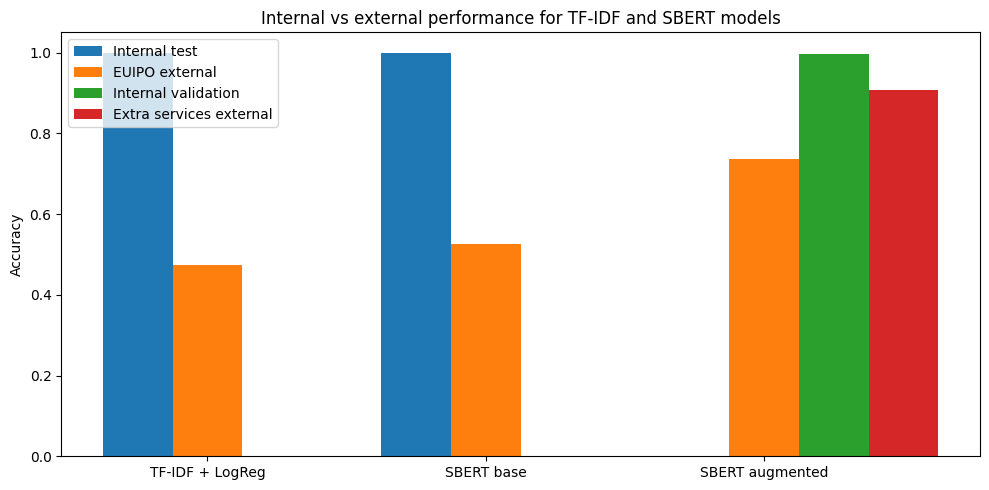

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

unique_models = results_visual["model"].unique()
model_index = {m: i for i, m in enumerate(unique_models)}

width = 0.25
settings = results_visual["setting"].unique()

for s_i, setting in enumerate(settings):
    subset = results_visual[results_visual["setting"] == setting]
    x = [model_index[m] + s_i * width for m in subset["model"]]
    plt.bar(
        x,
        subset["accuracy"],
        width=width,
        label=setting
    )

plt.xticks(
    [i + width for i in range(len(unique_models))],
    unique_models
)
plt.ylim(0, 1.05)
plt.ylabel("Accuracy")
plt.title("Internal vs external performance for TF-IDF and SBERT models")
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\alvar\AppData\Local\Temp\ipykernel_30328\3695217911.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


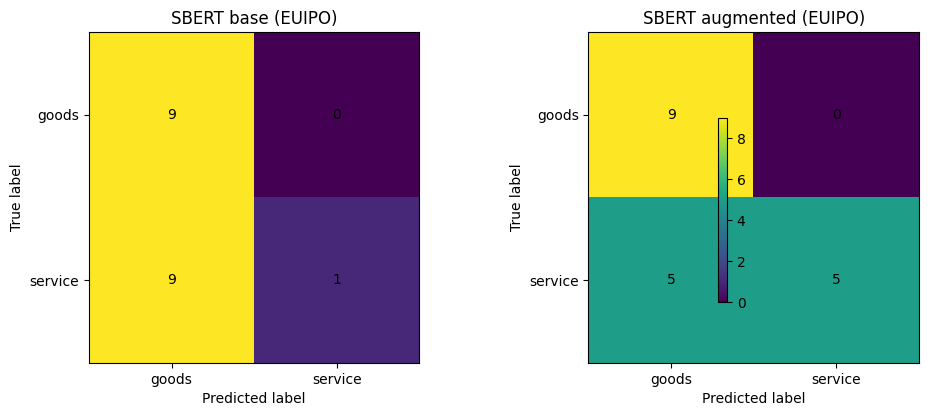

In [38]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

labels = ["goods", "service"]

cm_base = confusion_matrix(external_df["true_label"], external_df["pred_sbert"], labels=labels)
cm_aug = confusion_matrix(external_df["true_label"], external_df["pred_sbert_aug"], labels=labels)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for ax, cm, title in zip(
    axes,
    [cm_base, cm_aug],
    ["SBERT base (EUIPO)", "SBERT augmented (EUIPO)"]
):
    im = ax.imshow(cm, interpolation="nearest")
    ax.set_title(title)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")

    for i in range(len(labels)):
        for j in range(len(labels)):
            ax.text(j, i, cm[i, j], ha="center", va="center")

fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6)
plt.tight_layout()
plt.show()

Batches:   0%|          | 0/19 [00:00<?, ?it/s]

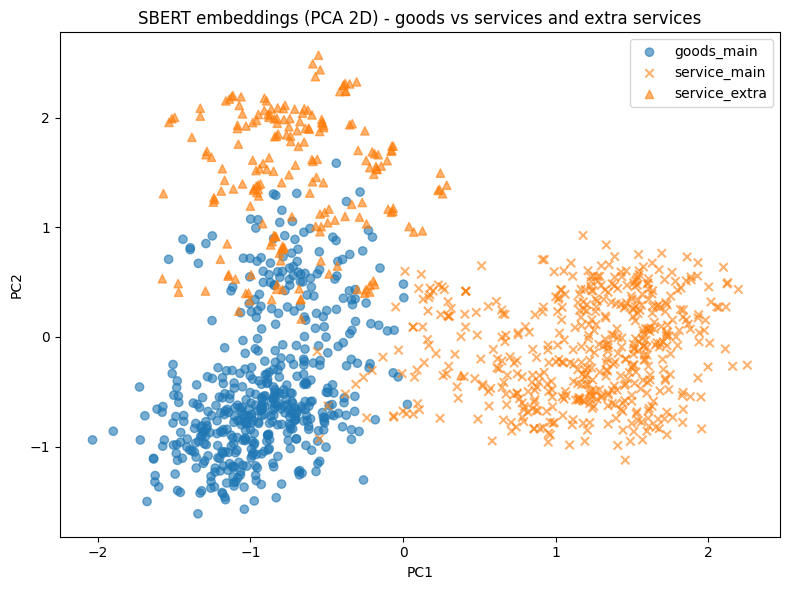

In [ ]:
from sklearn.decomposition import PCA

sample_goods = dfcopy[dfcopy["goods_or_services"] == "goods"].sample(500, random_state=42)
sample_services = dfcopy[dfcopy["goods_or_services"] == "service"].sample(500, random_state=42)

sample_extra = services_extra_df.sample(200, random_state=42)

plot_df = pd.concat([
    sample_goods.assign(source="goods_main"),
    sample_services.assign(source="service_main"),
    sample_extra.assign(source="service_extra")
], ignore_index=True)

texts_plot = plot_df["text_raw"].tolist()
emb_plot = sbert_model.encode(texts_plot, batch_size=64, show_progress_bar=True)

pca = PCA(n_components=2, random_state=42)
emb_2d = pca.fit_transform(emb_plot)

plot_df["pc1"] = emb_2d[:, 0]
plot_df["pc2"] = emb_2d[:, 1]

plt.figure(figsize=(8, 6))

color_map = {"goods": "tab:blue", "service": "tab:orange"}
marker_map = {
    "goods_main": "o",
    "service_main": "x",
    "service_extra": "^"
}

for source in plot_df["source"].unique():
    subset = plot_df[plot_df["source"] == source]
    plt.scatter(
        subset["pc1"],
        subset["pc2"],
        c=subset["goods_or_services"].map(color_map),
        marker=marker_map.get(source, "o"),
        alpha=0.6,
        label=source
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("SBERT embeddings (PCA 2D) - goods vs services and extra services")
plt.legend()
plt.tight_layout()
plt.show()

## Saving the final augmented SBERT classifier
We save the logistic regression classifier trained on SBERT embeddings, together with
the SBERT model name and the class order, so that the model can be loaded in the Streamlit app.


In [ ]:
import joblib
import json

SBERT_MODEL_NAME = "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2"

joblib.dump(sbert_clf_aug, "sbert_goods_services_augmented.pkl")

meta = {
    "sbert_model_name": SBERT_MODEL_NAME,
    "classes": list(sbert_clf_aug.classes_)
}

with open("sbert_goods_services_meta.json", "w") as f:
    json.dump(meta, f, indent=2)

print("Files saved:")
print("- sbert_goods_services_augmented.pkl")
print("- sbert_goods_services_meta.json")


Files saved:
- sbert_goods_services_augmented.pkl
- sbert_goods_services_meta.json


## SetFit classifier
We train a SetFit model (contrastive fine-tuning of a sentence transformer)
on the same train and validation splits as the TF-IDF baseline and SBERT model.


In [41]:
import sys
print(sys.executable)

import accelerate, torch, transformers
print("accelerate:", accelerate.__version__)
print("torch:", torch.__version__)
print("transformers:", transformers.__version__)


c:\Users\alvar\AppData\Local\Programs\Python\Python312\python.exe
accelerate: 1.12.0
torch: 2.9.1+cpu
transformers: 4.57.3


In [ ]:
import pandas as pd
from setfit import SetFitModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import json

setfit_model_id = "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2"

setfit_model = SetFitModel.from_pretrained(
    setfit_model_id,
    labels=["goods", "service"]  
)

print("SetFit model loaded:", setfit_model_id)

X_train_setfit = setfit_model.encode(
    X_train.tolist(),
    batch_size=64,
    show_progress_bar=True
)

X_val_setfit = setfit_model.encode(
    X_val.tolist(),
    batch_size=64,
    show_progress_bar=True
)

print("SetFit embeddings shapes:")
print("  Train:", X_train_setfit.shape)
print("  Val  :", X_val_setfit.shape)

setfit_clf = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

setfit_clf.fit(X_train_setfit, y_train)

y_val_pred_setfit = setfit_clf.predict(X_val_setfit)
val_acc_setfit = accuracy_score(y_val, y_val_pred_setfit)

print("\nSetFit style classifier (embeddings + LogReg) - validation accuracy:",
      val_acc_setfit)

print("\nValidation classification report:")
print(classification_report(y_val, y_val_pred_setfit))

print("\nValidation confusion matrix:")
print(confusion_matrix(y_val, y_val_pred_setfit))

X_test_setfit = setfit_model.encode(
    X_test.tolist(),
    batch_size=64,
    show_progress_bar=True
)

y_test_pred_setfit = setfit_clf.predict(X_test_setfit)
test_acc_setfit = accuracy_score(y_test, y_test_pred_setfit)

print("\nSetFit style classifier - test accuracy:", test_acc_setfit)
print("\nTest classification report:")
print(classification_report(y_test, y_test_pred_setfit))
print("\nTest confusion matrix:")
print(confusion_matrix(y_test, y_test_pred_setfit))

joblib.dump(setfit_clf, "setfit_goods_services_sklearn.pkl")

meta_setfit = {
    "setfit_model_name": setfit_model_id,
    "classes": list(setfit_clf.classes_)
}

with open("setfit_goods_services_meta.json", "w") as f:
    json.dump(meta_setfit, f, indent=2)

print("\nFiles saved:")
print("- setfit_goods_services_sklearn.pkl")
print("- setfit_goods_services_meta.json")


model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.


SetFit model loaded: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2


Batches:   0%|          | 0/1145 [00:00<?, ?it/s]

Batches:   0%|          | 0/287 [00:00<?, ?it/s]

SetFit embeddings shapes:
  Train: (73257, 384)
  Val  : (18315, 384)

SetFit style classifier (embeddings + LogReg) - validation accuracy: 0.999017199017199

Validation classification report:
              precision    recall  f1-score   support

       goods       1.00      1.00      1.00      8303
     service       1.00      1.00      1.00     10012

    accuracy                           1.00     18315
   macro avg       1.00      1.00      1.00     18315
weighted avg       1.00      1.00      1.00     18315


Validation confusion matrix:
[[ 8296     7]
 [   11 10001]]


Batches:   0%|          | 0/358 [00:00<?, ?it/s]


SetFit style classifier - test accuracy: 0.9982964224872232

Test classification report:
              precision    recall  f1-score   support

       goods       1.00      1.00      1.00     10378
     service       1.00      1.00      1.00     12515

    accuracy                           1.00     22893
   macro avg       1.00      1.00      1.00     22893
weighted avg       1.00      1.00      1.00     22893


Test confusion matrix:
[[10359    19]
 [   20 12495]]

Files saved:
- setfit_goods_services_sklearn.pkl
- setfit_goods_services_meta.json


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from datasets import Dataset
from setfit import (
    SetFitModel,
    Trainer,
    TrainingArguments,
    sample_dataset,
)

df_full = pd.read_csv("df_full.csv", low_memory=False)

df_gs = df_full[["text_raw", "goods_or_services"]].dropna().copy()

label_map = {"goods": 0, "service": 1}
df_gs["label"] = df_gs["goods_or_services"].map(label_map)

df_gs = df_gs.rename(columns={"text_raw": "text"})

print("Data size for SetFit:", len(df_gs))
print(df_gs["goods_or_services"].value_counts(normalize=True).rename("proportion"))

train_df, test_df = train_test_split(
    df_gs,
    test_size=0.2,
    random_state=42,
    stratify=df_gs["label"],
)

print("Train size:", len(train_df))
print("Test size:", len(test_df))

train_dataset_full = Dataset.from_pandas(
    train_df[["text", "label"]],
    preserve_index=False
)
test_dataset = Dataset.from_pandas(
    test_df[["text", "label"]],
    preserve_index=False
)

train_dataset = sample_dataset(
    train_dataset_full,
    label_column="label",
    num_samples=32  
)

print("Few-shot train dataset:")
print(train_dataset)

model = SetFitModel.from_pretrained(
    "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2",
    labels=["goods", "service"],  # nice for readable predictions
)

args = TrainingArguments(
    batch_size=32,
    num_epochs=10,
)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,   # for eval() later
)

trainer.train()

metrics = trainer.evaluate()
print("SetFit HF metrics dict:", metrics)

y_true = test_dataset["label"]
y_pred_labels = model.predict(test_dataset["text"])

inv_label_map = {"goods": 0, "service": 1}
y_pred = [inv_label_map[l] for l in y_pred_labels]

print("\nSetFit classification report on test set:")
print(classification_report(
    y_true,
    y_pred,
    target_names=["goods", "service"]
))

model.save_pretrained("setfit-goods-services-multilingual")

print("\nModel saved in folder: setfit-goods-services-multilingual")



Data size for SetFit: 115062
goods_or_services
service    0.549026
goods      0.450974
Name: proportion, dtype: float64
Train size: 92049
Test size: 23013
Few-shot train dataset:
Dataset({
    features: ['text', 'label'],
    num_rows: 64
})


model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.
c:\Users\alvar\AppData\Local\Programs\Python\Python312\Lib\site-packages\datasets\utils\_dill.py:379: DeprecationWarning: co_lnotab is deprecated, use co_lines instead.
  obj.co_lnotab,  # for < python 3.10 [not counted in args]


Map:   0%|          | 0/64 [00:00<?, ? examples/s]

***** Running training *****
  Num unique pairs = 2112
  Batch size = 32
  Num epochs = 10
c:\Users\alvar\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
1,0.317200
50,0.121500
100,0.001000
150,0.000200
200,0.000100
250,0.000100
300,0.000100
350,0.000100
400,0.000100
450,0.000100


c:\Users\alvar\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
***** Running evaluation *****


SetFit HF metrics dict: {'accuracy': 0.9973493242949637}

SetFit classification report on test set:
              precision    recall  f1-score   support

       goods       0.99      1.00      1.00     10378
     service       1.00      1.00      1.00     12635

    accuracy                           1.00     23013
   macro avg       1.00      1.00      1.00     23013
weighted avg       1.00      1.00      1.00     23013


Model saved in folder: setfit-goods-services-multilingual


## External validation: TF-IDF, SBERT (base and augmented), and SetFit
We evaluate all models on the EUIPO-like external validation set and compare accuracy and F1 scores.


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np
import pandas as pd
import joblib
import json
from sentence_transformers import SentenceTransformer

ext_texts = external_df["text"].astype(str).tolist()
ext_true = external_df["true_label"].tolist() 

ext_texts_clean = [clean_text(t) for t in ext_texts]
y_ext_pred_tfidf = tfidf_logreg.predict(ext_texts_clean)

ext_emb_base = sbert_model.encode(ext_texts, batch_size=64, show_progress_bar=False)
y_ext_pred_sbert = sbert_clf.predict(ext_emb_base)

y_ext_pred_sbert_aug = sbert_clf_aug.predict(ext_emb_base)

with open("setfit_goods_services_meta.json", "r") as f:
    meta_setfit = json.load(f)

setfit_encoder_name = meta_setfit["setfit_model_name"]
setfit_clf = joblib.load("setfit_goods_services_sklearn.pkl")

print("Loaded SetFit encoder:", setfit_encoder_name)
print("SetFit classes:", setfit_clf.classes_)

setfit_encoder = SentenceTransformer(setfit_encoder_name)
ext_emb_setfit = setfit_encoder.encode(ext_texts, batch_size=64, show_progress_bar=False)

y_ext_pred_setfit = setfit_clf.predict(ext_emb_setfit)

from setfit import SetFitModel

setfit_real = SetFitModel.from_pretrained(
    "setfit-goods-services-multilingual"
)

y_ext_pred_setfit_real = setfit_real.predict(ext_texts)


def compute_metrics_for_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1_macro = f1_score(y_true, y_pred, average="macro")
    f1_weighted = f1_score(y_true, y_pred, average="weighted")
    print(f"\n=== {name} ===")
    print("Accuracy:", acc)
    print("F1 macro:", f1_macro)
    print("F1 weighted:", f1_weighted)
    print("\nClassification report:")
    print(classification_report(y_true, y_pred))
    return {
        "model": name,
        "accuracy": acc,
        "f1_macro": f1_macro,
        "f1_weighted": f1_weighted
    }

results = []
results.append(compute_metrics_for_model("TF-IDF + LogReg", ext_true, y_ext_pred_tfidf))
results.append(compute_metrics_for_model("SBERT + LogReg (base)", ext_true, y_ext_pred_sbert))
results.append(compute_metrics_for_model("SBERT + LogReg (augmented)", ext_true, y_ext_pred_sbert_aug))
results.append(compute_metrics_for_model("SetFit style (SBERT + LogReg)", ext_true, y_ext_pred_setfit))
results.append(compute_metrics_for_model("SetFit (real, Trainer, few-shot)", ext_true, y_ext_pred_setfit_real))

results_df = pd.DataFrame(results)
print("\n\n=== External validation comparison (EUIPO-like) ===")
print(results_df)



Loaded SetFit encoder: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
SetFit classes: ['goods' 'service']


The tokenizer you are loading from 'setfit-goods-services-multilingual' with an incorrect regex pattern: https://huggingface.co/mistralai/Mistral-Small-3.1-24B-Instruct-2503/discussions/84#69121093e8b480e709447d5e. This will lead to incorrect tokenization. You should set the `fix_mistral_regex=True` flag when loading this tokenizer to fix this issue.



=== TF-IDF + LogReg ===
Accuracy: 0.47368421052631576
F1 macro: 0.32142857142857145
F1 weighted: 0.3045112781954888

Classification report:
              precision    recall  f1-score   support

       goods       0.47      1.00      0.64         9
     service       0.00      0.00      0.00        10

    accuracy                           0.47        19
   macro avg       0.24      0.50      0.32        19
weighted avg       0.22      0.47      0.30        19


=== SBERT + LogReg (base) ===
Accuracy: 0.5263157894736842
F1 macro: 0.4242424242424242
F1 weighted: 0.41148325358851673

Classification report:
              precision    recall  f1-score   support

       goods       0.50      1.00      0.67         9
     service       1.00      0.10      0.18        10

    accuracy                           0.53        19
   macro avg       0.75      0.55      0.42        19
weighted avg       0.76      0.53      0.41        19


=== SBERT + LogReg (augmented) ===
Accuracy: 0.73684210526

c:\Users\alvar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\alvar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\alvar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

## Category inspection
We first inspect the raw category field and derive simple root categories from the original taxonomy.


In [ ]:
print("Number of unique categories:", df["category"].nunique())

categories = sorted(df["category"].dropna().unique())
categories[:50] 


Number of unique categories: 218


['Airline',
 'Books',
 'Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers',
 'Clothing & Accessories',
 'Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters',
 'Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets',
 'Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones',
 'Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers',
 'Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|Webcams&VoIPEquipment|Webcams',
 'Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors',
 'Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|DVICables',
 'Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|EthernetCables',
 'Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|SATACables',
 'Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables

In [47]:
print("Number of unique categories:", df["category"].nunique())

categories = sorted(df["category"].dropna().unique())
categories[:50]  


Number of unique categories: 218


['Airline',
 'Books',
 'Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers',
 'Clothing & Accessories',
 'Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters',
 'Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets',
 'Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones',
 'Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers',
 'Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|Webcams&VoIPEquipment|Webcams',
 'Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors',
 'Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|DVICables',
 'Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|EthernetCables',
 'Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|SATACables',
 'Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables

In [48]:
import pandas as pd

def get_root(cat):
    if pd.isna(cat):
        return "Unknown"
    return str(cat).split("|")[0]

df["root_category"] = df["category"].apply(get_root)

print("Number of unique root categories:", df["root_category"].nunique())
print(sorted(df["root_category"].unique()))

df["root_category"].value_counts()

Number of unique root categories: 15
['Airline', 'Books', 'Car&Motorbike', 'Clothing & Accessories', 'Computers&Accessories', 'Electronics', 'Health&PersonalCare', 'Home&Kitchen', 'HomeImprovement', 'Hotels', 'Household', 'MusicalInstruments', 'OfficeProducts', 'Restaurants', 'Toys&Games']


root_category
Hotels                    29404
Airline                   23171
Household                 19313
Books                     11820
Electronics               11147
Restaurants               10000
Clothing & Accessories     8671
Computers&Accessories       453
Home&Kitchen                448
OfficeProducts               31
MusicalInstruments            2
HomeImprovement               2
Toys&Games                    1
Car&Motorbike                 1
Health&PersonalCare           1
Name: count, dtype: int64

## Full dataset with extra services and macro categories
We combine the main dataset with the additional service descriptions and map both goods and services
into a smaller set of macro categories.


In [ ]:
import numpy as np

if "text_raw" not in df.columns:
    df["name"] = df["name"].fillna("")
    df["about_product"] = df["about_product"].fillna("")
    df["review"] = df["review"].fillna("")
    df["text_raw"] = (
        df["name"].astype(str) + ". " +
        df["about_product"].astype(str) + ". " +
        df["review"].astype(str)
    ).str.strip()

services_extra_for_merge = services_extra_df.copy()

services_extra_for_merge["name"] = ""
services_extra_for_merge["about_product"] = services_extra_for_merge["text"]
services_extra_for_merge["review"] = ""
services_extra_for_merge["category"] = "SyntheticService"  
services_extra_for_merge["source"] = "extra_services"

services_extra_for_merge["text_raw"] = services_extra_for_merge["about_product"]

if "category_specific" not in df.columns:
    df["category_specific"] = np.nan

services_extra_for_merge = services_extra_for_merge[
    ["name", "about_product", "review",
     "goods_or_services", "category", "category_specific",
     "text_raw", "source"]
]

if "source" not in df.columns:
    df["source"] = "main"

df = df[
    ["name", "about_product", "review",
     "goods_or_services", "category", "category_specific",
     "text_raw", "source"]
]

df_full = pd.concat([df, services_extra_for_merge], ignore_index=True)

print("Full dataset shape (main + extra services):", df_full.shape)
print(df_full["goods_or_services"].value_counts())

Full dataset shape (main + extra services): (115062, 8)
goods_or_services
service    63172
goods      51890
Name: count, dtype: int64


In [ ]:
def map_macro_category(cat, gos, category_specific=None):
    cat = str(cat)

    if gos == "goods":
        if cat.startswith("Electronics"):
            return "Electronics"
        if cat.startswith("Computers&Accessories"):
            return "Computers & Accessories"
        if "MobileAccessories" in cat or "Chargers" in cat or "USBCables" in cat:
            return "Mobile Accessories"
        if "Cameras&Photography" in cat:
            return "Cameras & Photography"
        if cat.startswith("Home&Kitchen"):
            return "Home & Kitchen"
        if cat.startswith("HomeImprovement"):
            return "Home Improvement"
        if cat.startswith("Health&PersonalCare"):
            return "Health & Personal Care"
        if cat.startswith("OfficeProducts"):
            return "Office Products"
        if cat.startswith("Car&Motorbike"):
            return "Car & Motorbike"
        if cat.startswith("Toys&Games"):
            return "Toys & Games"
        if cat == "Books":
            return "Books"
        if cat.startswith("Household"):
            return "Household Products"
        if cat.startswith("MusicalInstruments"):
            return "Musical Instruments"

        return "Other Goods"

    if gos == "service":
        if cat in ["Airline", "Hotels", "Restaurants"]:
            return "Travel & Hospitality"

        if category_specific:
            spec = str(category_specific).lower()

            if "business consulting" in spec or "consulting" in spec or "business" in spec:
                return "Business Consulting"
            if "it services" in spec or "cloud" in spec or "saas" in spec or "software" in spec:
                return "IT / Software / Cloud"
            if "legal" in spec:
                return "Legal Services"
            if "financial" in spec or "loans" in spec or "insurance" in spec:
                return "Financial Services"
            if "education" in spec or "training" in spec:
                return "Education & Training"
            if "healthcare" in spec or "psychological" in spec or "medical" in spec:
                return "Healthcare / Psychological Services"
            if "home services" in spec or "cleaning" in spec or "repairs" in spec:
                return "Home / Repair / Cleaning Services"
            if "security" in spec:
                return "Security Services"

        return "Other Services"

    return "Unknown"

df_full["macro_category"] = df_full.apply(
    lambda row: map_macro_category(
        row["category"],
        row["goods_or_services"],
        row.get("category_specific")
    ),
    axis=1
)

print(df_full["macro_category"].value_counts())

macro_category
Travel & Hospitality                   62575
Household Products                     19313
Books                                  11820
Electronics                            11147
Other Goods                             8671
Computers & Accessories                  453
Home & Kitchen                           448
Business Consulting                       90
Home / Repair / Cleaning Services         80
IT / Software / Cloud                     80
Education & Training                      74
Financial Services                        74
Legal Services                            67
Healthcare / Psychological Services       67
Security Services                         65
Office Products                           31
Home Improvement                           2
Musical Instruments                        2
Toys & Games                               1
Car & Motorbike                            1
Health & Personal Care                     1
Name: count, dtype: int64


## SBERT macro category classifier
We train a multiclass Logistic Regression classifier on SBERT embeddings to predict macro categories.


In [ ]:
from sklearn.model_selection import train_test_split

df_cat = df_full[["text_raw", "macro_category"]].dropna(subset=["macro_category"]).copy()

vc = df_cat["macro_category"].value_counts()
print(vc)

min_count = 5
valid_categories = vc[vc >= min_count].index
print("\nCategories kept (>= 5 examples):")
print(valid_categories)

df_cat_filtered = df_cat[df_cat["macro_category"].isin(valid_categories)].copy()

print("\nFiltered dataset size:", len(df_cat_filtered))
print(df_cat_filtered["macro_category"].value_counts())

X_c = df_cat_filtered["text_raw"]
y_c = df_cat_filtered["macro_category"]

X_train_c, X_temp_c, y_train_c, y_temp_c = train_test_split(
    X_c, y_c,
    test_size=0.3,
    stratify=y_c,
    random_state=42
)

X_val_c, X_test_c, y_val_c, y_test_c = train_test_split(
    X_temp_c, y_temp_c,
    test_size=0.5,
    stratify=y_temp_c,
    random_state=42
)

print("\nCategory - train size:", len(X_train_c))
print("Category - val size:", len(X_val_c))
print("Category - test size:", len(X_test_c))

print("\nTrain distribution:")
print(y_train_c.value_counts(normalize=True))

macro_category
Travel & Hospitality                   62575
Household Products                     19313
Books                                  11820
Electronics                            11147
Other Goods                             8671
Computers & Accessories                  453
Home & Kitchen                           448
Business Consulting                       90
Home / Repair / Cleaning Services         80
IT / Software / Cloud                     80
Education & Training                      74
Financial Services                        74
Legal Services                            67
Healthcare / Psychological Services       67
Security Services                         65
Office Products                           31
Home Improvement                           2
Musical Instruments                        2
Toys & Games                               1
Car & Motorbike                            1
Health & Personal Care                     1
Name: count, dtype: int64

Categories ke

In [ ]:
from sentence_transformers import SentenceTransformer

sbert_model_cat = SentenceTransformer("sentence-transformers/paraphrase-multilingual-mpnet-base-v2")

train_texts_c = X_train_c.tolist()
val_texts_c = X_val_c.tolist()
test_texts_c = X_test_c.tolist()

X_train_emb_c = sbert_model_cat.encode(train_texts_c, batch_size=64, show_progress_bar=True)
X_val_emb_c   = sbert_model_cat.encode(val_texts_c,   batch_size=64, show_progress_bar=True)
X_test_emb_c  = sbert_model_cat.encode(test_texts_c,  batch_size=64, show_progress_bar=True)

print("Category - train embeddings shape:", X_train_emb_c.shape)
print("Category - val embeddings shape:",   X_val_emb_c.shape)
print("Category - test embeddings shape:",  X_test_emb_c.shape)


Batches:   0%|          | 0/1259 [00:01<?, ?it/s]

Batches:   0%|          | 0/270 [00:00<?, ?it/s]

Batches:   0%|          | 0/270 [00:00<?, ?it/s]

Category - train embeddings shape: (80538, 768)
Category - val embeddings shape: (17258, 768)
Category - test embeddings shape: (17259, 768)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

cat_clf = LogisticRegression(
    max_iter=1000,
    n_jobs=-1,
    multi_class="multinomial"
)

cat_clf.fit(X_train_emb_c, y_train_c)

y_val_pred_c = cat_clf.predict(X_val_emb_c)
val_acc_c = accuracy_score(y_val_c, y_val_pred_c)

print("Category classifier - validation accuracy:", val_acc_c)
print("\nValidation classification report:")
print(classification_report(y_val_c, y_val_pred_c))

print("\nValidation confusion matrix:")
print(confusion_matrix(y_val_c, y_val_pred_c))

y_test_pred_c = cat_clf.predict(X_test_emb_c)
test_acc_c = accuracy_score(y_test_c, y_test_pred_c)

print("Category classifier - test accuracy:", test_acc_c)
print("\nTest classification report:")
print(classification_report(y_test_c, y_test_pred_c))

print("\nTest confusion matrix:")
print(confusion_matrix(y_test_c, y_test_pred_c))



c:\Users\alvar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Category classifier - validation accuracy: 0.9733456947502608

Validation classification report:
                                     precision    recall  f1-score   support

                              Books       0.95      0.95      0.95      1773
                Business Consulting       1.00      1.00      1.00        14
            Computers & Accessories       0.89      0.60      0.72        68
               Education & Training       0.92      1.00      0.96        11
                        Electronics       0.93      0.93      0.93      1672
                 Financial Services       1.00      0.91      0.95        11
Healthcare / Psychological Services       1.00      0.90      0.95        10
                     Home & Kitchen       0.72      0.34      0.46        67
  Home / Repair / Cleaning Services       1.00      0.83      0.91        12
                 Household Products       0.93      0.96      0.94      2897
              IT / Software / Cloud       1.00      0.9

## Category distributions and confusion matrix
We visualize the distribution of macro categories and the confusion matrix of the category classifier.


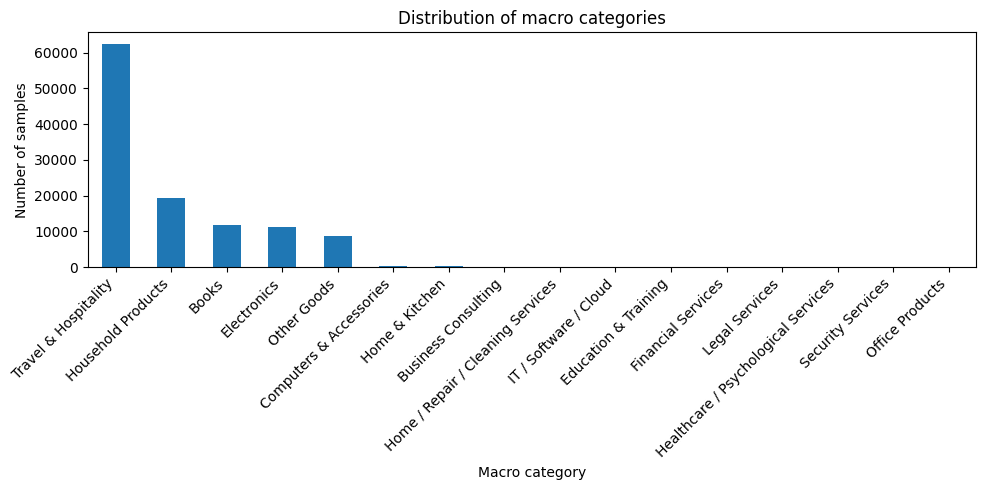

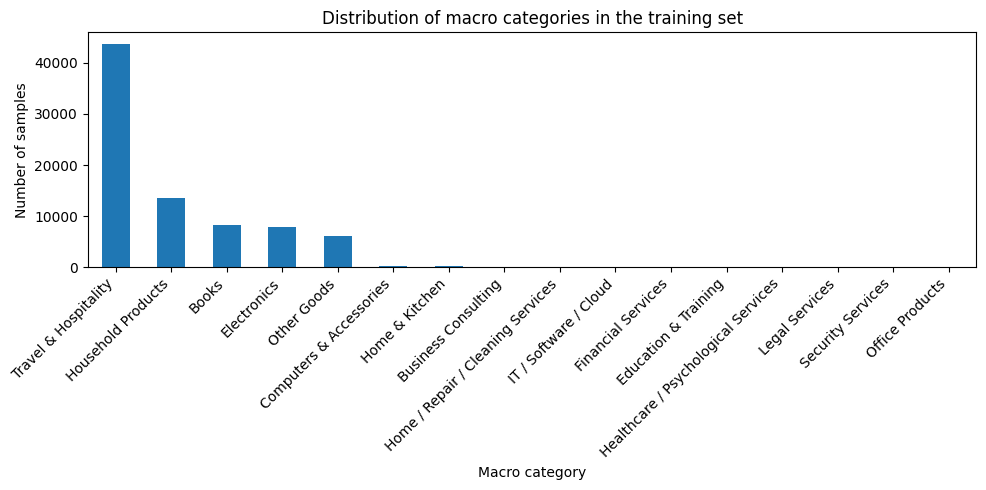

In [ ]:
import matplotlib.pyplot as plt

cat_counts = df_cat_filtered["macro_category"].value_counts()

plt.figure(figsize=(10, 5))
cat_counts.plot(kind="bar")
plt.title("Distribution of macro categories")
plt.xlabel("Macro category")
plt.ylabel("Number of samples")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

train_cat_counts = y_train_c.value_counts()

plt.figure(figsize=(10, 5))
train_cat_counts.plot(kind="bar")
plt.title("Distribution of macro categories in the training set")
plt.xlabel("Macro category")
plt.ylabel("Number of samples")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



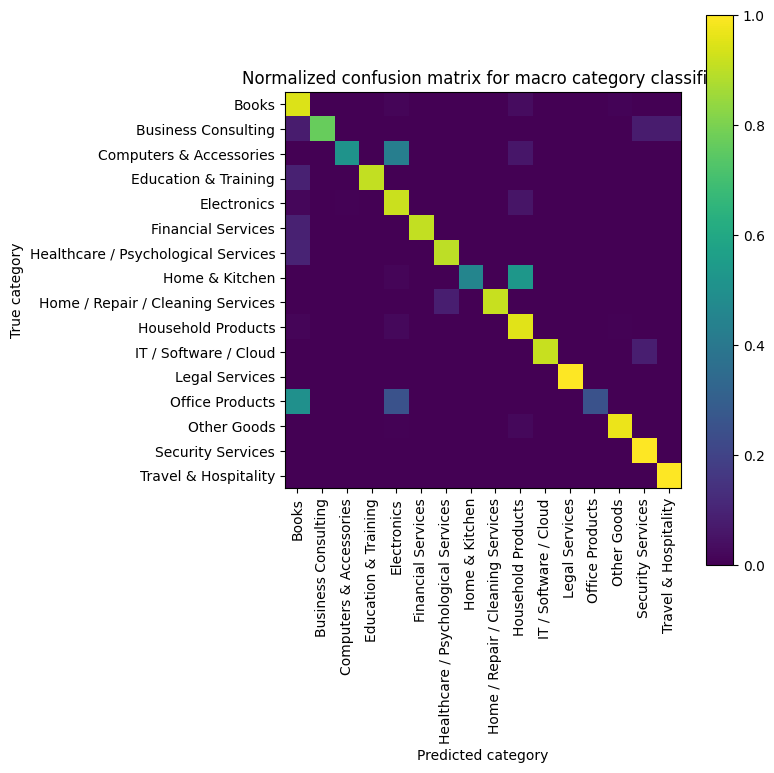

In [55]:
import numpy as np
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_c, y_test_pred_c, labels=cat_clf.classes_)
cm_norm = cm.astype("float") / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(8, 8))
plt.imshow(cm_norm, interpolation="nearest")
plt.title("Normalized confusion matrix for macro category classifier")
plt.colorbar()

tick_marks = np.arange(len(cat_clf.classes_))
plt.xticks(tick_marks, cat_clf.classes_, rotation=90)
plt.yticks(tick_marks, cat_clf.classes_)

plt.ylabel("True category")
plt.xlabel("Predicted category")
plt.tight_layout()
plt.show()


## Embedding visualization by macro category
We project SBERT embeddings into two dimensions using PCA and color points by macro category.


C:\Users\alvar\AppData\Local\Temp\ipykernel_30328\3352660460.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), max_per_cat), random_state=42))


Visualization dataset size: 4029


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Explained variance ratio: [0.09053052 0.05584867]


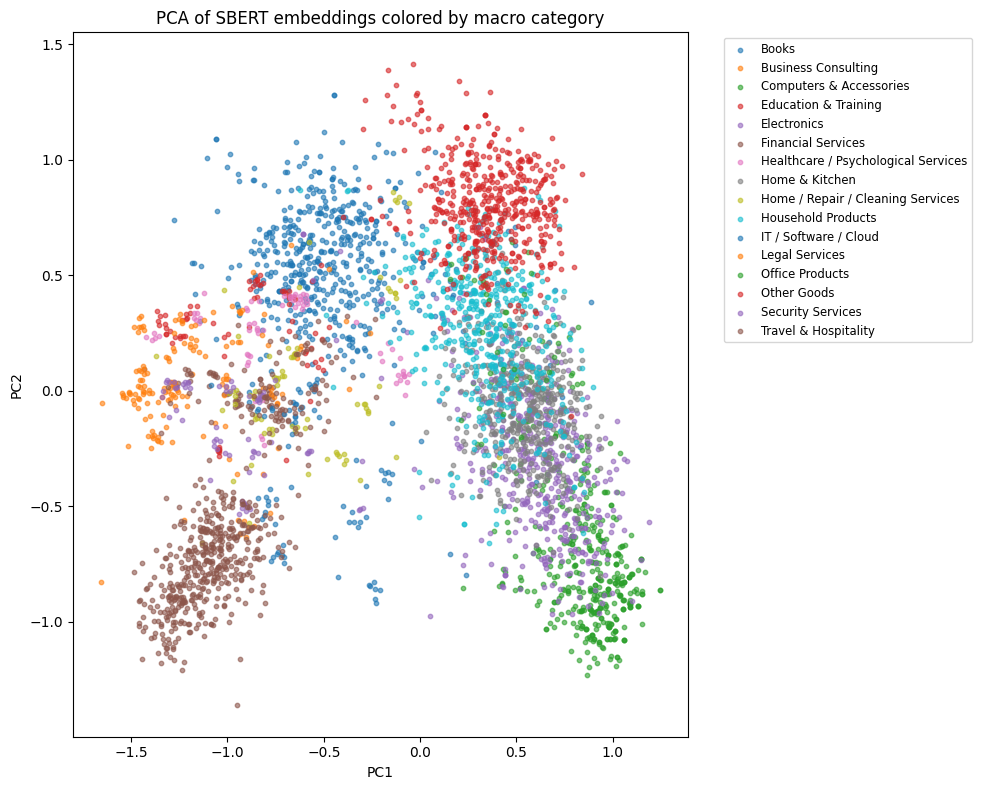

In [ ]:
from sklearn.decomposition import PCA

df_vis = df_cat_filtered.copy()

max_per_cat = 500
df_vis = (
    df_vis.groupby("macro_category")
          .apply(lambda x: x.sample(min(len(x), max_per_cat), random_state=42))
          .reset_index(drop=True)
)

print("Visualization dataset size:", len(df_vis))

texts_vis = df_vis["text_raw"].tolist()
cats_vis = df_vis["macro_category"].tolist()

emb_vis = sbert_model_cat.encode(texts_vis, batch_size=64, show_progress_bar=True)

pca = PCA(n_components=2, random_state=42)
emb_2d = pca.fit_transform(emb_vis)

print("Explained variance ratio:", pca.explained_variance_ratio_)

plt.figure(figsize=(10, 8))

unique_cats = sorted(df_vis["macro_category"].unique())

for cat in unique_cats:
    mask = df_vis["macro_category"] == cat
    plt.scatter(
        emb_2d[mask, 0],
        emb_2d[mask, 1],
        s=10,
        alpha=0.6,
        label=cat
    )

plt.title("PCA of SBERT embeddings colored by macro category")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small")
plt.tight_layout()
plt.show()


## Saving the macro category classifier and full dataset
We save the SBERT based macro category classifier together with its metadata,
and export the full dataset including extra services for reproducibility.


In [ ]:
import joblib
import json

SBERT_MODEL_NAME_CAT = "sentence-transformers/paraphrase-multilingual-mpnet-base-v2"

joblib.dump(cat_clf, "sbert_category_classifier.pkl")

meta_categories = {
    "sbert_model_name": SBERT_MODEL_NAME_CAT,
    "classes": [str(c) for c in cat_clf.classes_]
}

with open("sbert_category_meta.json", "w") as f:
    json.dump(meta_categories, f, indent=2)

print("Files saved:")
print("- sbert_category_classifier.pkl")
print("- sbert_category_meta.json")


Files saved:
- sbert_category_classifier.pkl
- sbert_category_meta.json


In [ ]:
df_full.to_csv("df_full.csv", index=False, encoding="utf-8")
print("df_full.csv saved.")

df_full.csv saved.
